### Step 1. Import packages



In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import Regress as nsr
import math
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from scipy import linalg
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from matplotlib import rcParams
rcParams['axes.labelsize']='x-large'
rcParams['figure.figsize']=(10,10)

#rcParams.setdefault()

In [4]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    yield 
    np.set_printoptions(**original)

In [5]:
%store -r evid_list
%store -r evid_list1
%store -r evid_list2

In [143]:
%store -r evid_list_full
%store -r evid_list_full1
%store -r evid_list_full2

no stored variable evid_list_full1
no stored variable evid_list_full2


In [7]:
len(evid_list),len(evid_list1), len(evid_list2)

(8, 3628, 10000)

### Step 2. Import data

In [9]:
fund_data_120 = pd.read_excel('Copy of Daily weekly monthly smoothness 2.xlsx','Funds daily over 60 days')
assets_data_120 = pd.read_excel('Copy of Daily weekly monthly smoothness 2.xlsx','Factors daily over 60 days')
overall_data = pd.read_excel('Copy of Daily weekly monthly smoothness 2.xlsx','Funds')

In [10]:
max_days = 60 #!!!
funds_to_test = [0, 1, 3, 5, 6, 8, 10, 12, 14, 16]
funds = fund_data_120.iloc[7:64, funds_to_test].values.astype(float)
assets = assets_data_120.iloc[2:59,:11].values.astype(float)#last one isn't in funds
assetnames = assets_data_120.columns.values[:11].astype(str)
dates = np.array([stri[:-9] for stri in fund_data_120.iloc[7:max_days+7].index.values.astype(str)])
fundnames = fund_data_120.iloc[:,funds_to_test].columns.values.astype(str)
#### Ограничения равенства
assetstbl = (assets - assets[:,0][:,np.newaxis])[:,1:]
fundstbl = funds - assets[:,0][:,np.newaxis]
####
assetsall = np.mat(assetstbl)
fundsall = np.mat(fundstbl)
smoothness = fund_data_120.iloc[2,funds_to_test].values.astype(float) 
turn_overs = overall_data.iloc[2].values.astype(float)[::3][funds_to_test]

In [11]:
turn_overs[-2]
fundnames[-2]

'ALPS/Sterling ETF Tactical Rotation A'

In [12]:
raw_funds = fund_data_120.iloc[7:64, funds_to_test].values.astype(float)
raw_assets = assets_data_120.iloc[2:59,:11].values.astype(float)#last one isn't in funds

In [13]:
N, n = assetstbl.shape
U = np.zeros((N, n, n))
V = np.zeros((N, n, n))
for i in range(1, N):
    U[i] = np.eye(n)
    V[i] = np.eye(n)
X = np.zeros((N*n, N))
for i in range(N):
    X[n*i:n*(i+1), i] = assetstbl[i]
    

### Step 3. A look at the returns

<IPython.core.display.Javascript object>


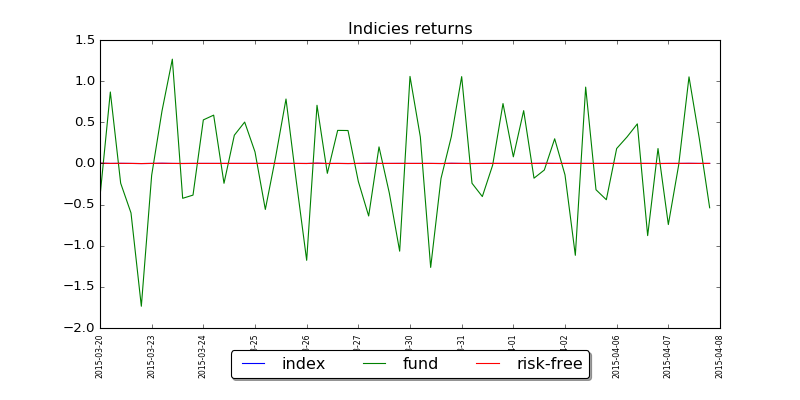

<IPython.core.display.Javascript object>


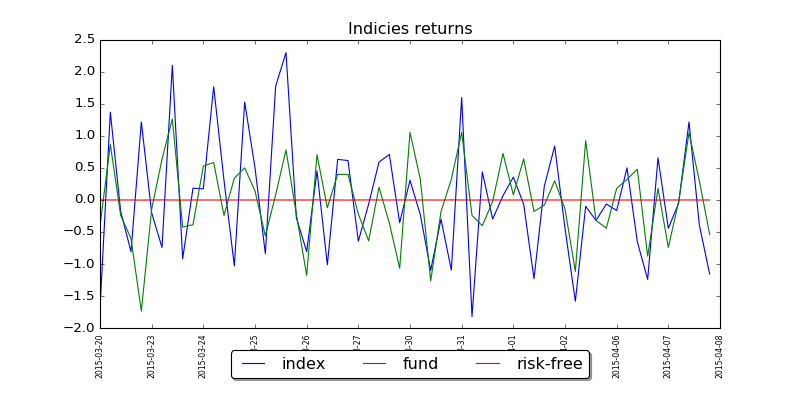

<IPython.core.display.Javascript object>


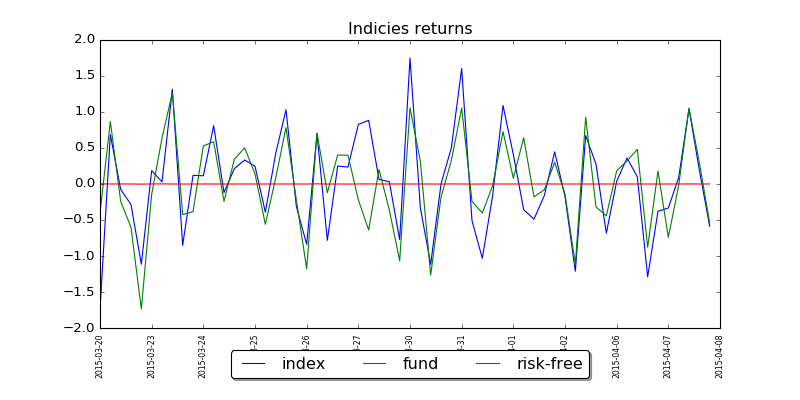

<IPython.core.display.Javascript object>


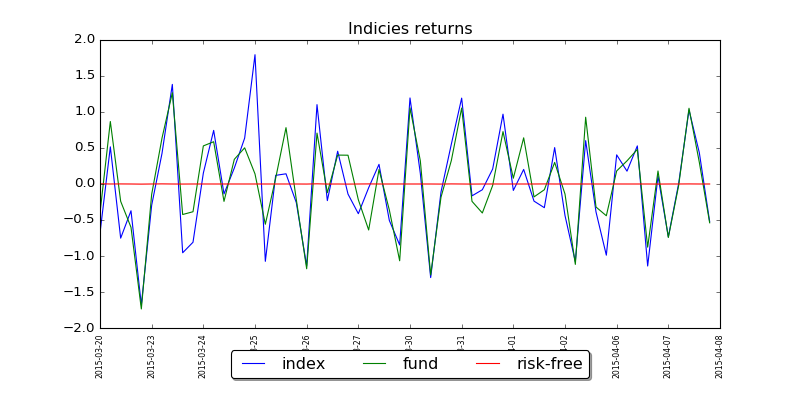

<IPython.core.display.Javascript object>


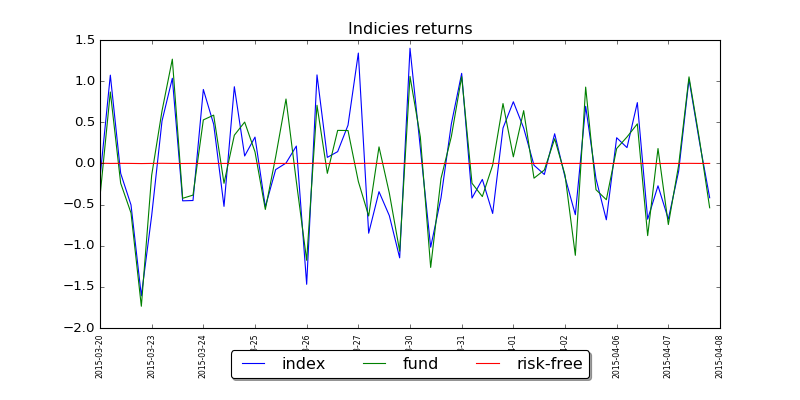

<IPython.core.display.Javascript object>


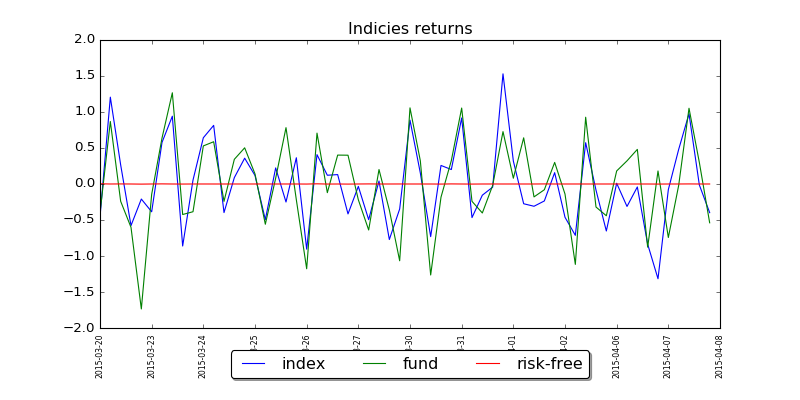

<IPython.core.display.Javascript object>


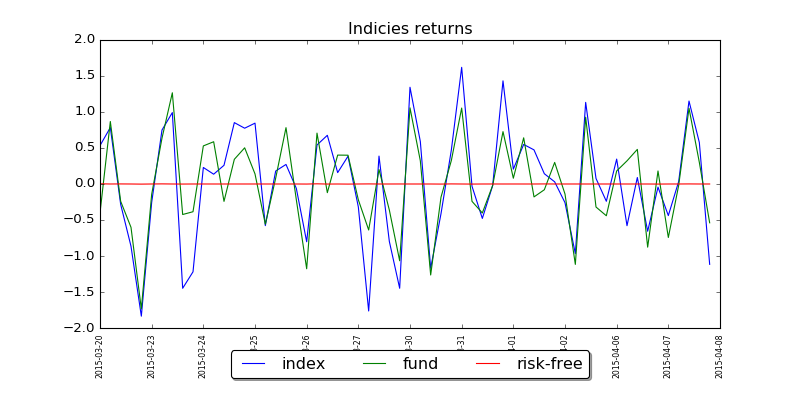

<IPython.core.display.Javascript object>


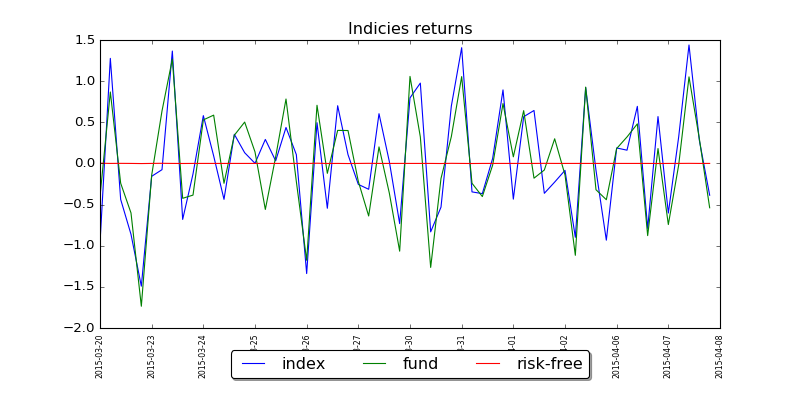

<IPython.core.display.Javascript object>


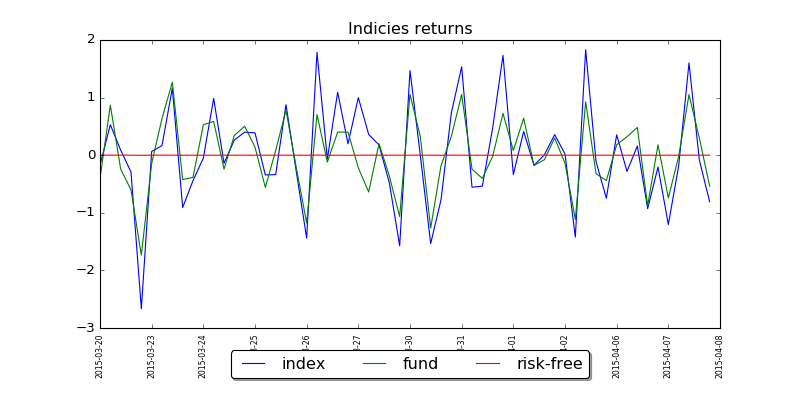

<IPython.core.display.Javascript object>


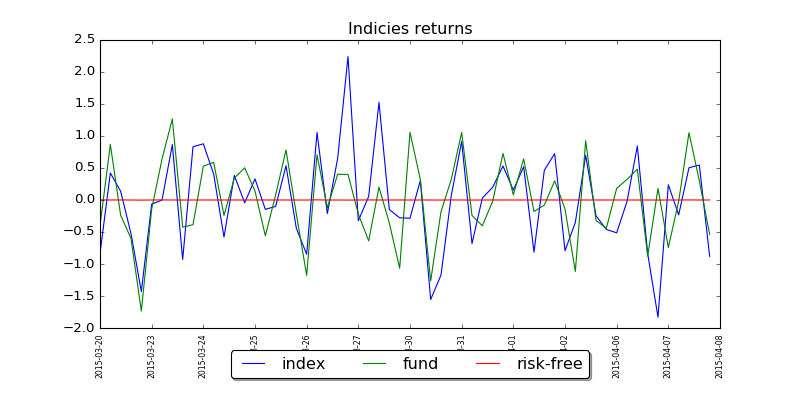

<IPython.core.display.Javascript object>


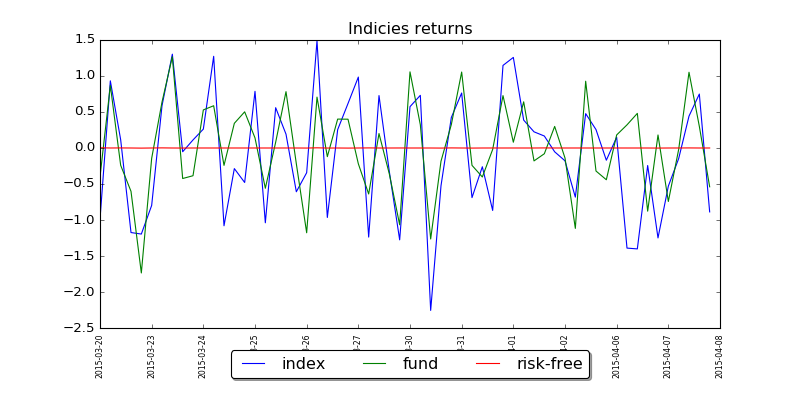

<IPython.core.display.Javascript object>


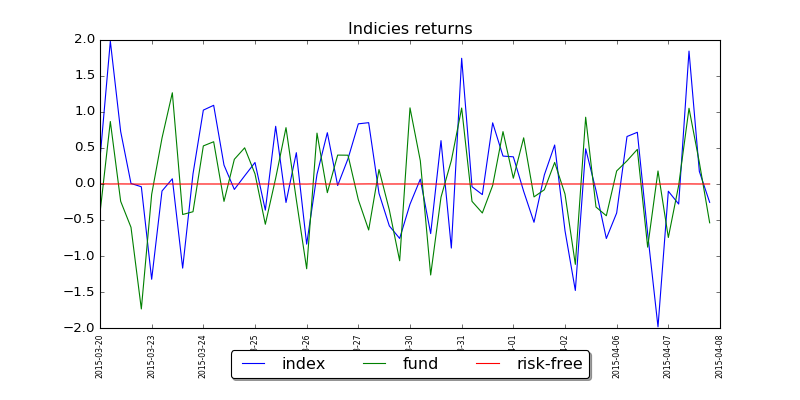

In [4]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)



fnum = 0

plt.close("all")

time =  range(T)


#plt.subplot(3,1,1)
for i in range(0,n):
    plt.figure(figsize=(10,5)) 
    plt.title('Indicies returns')
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)
    plt.plot(time, assetsall[:,i], label = 'index')
    plt.plot(time, fundsall[:,fnum], label = 'fund')
    plt.plot(time, assetsall[:,0], label = 'risk-free')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)
    plt.show()

## Example of return

0 0.0267940239028
1 0.0285475177413
2 0.0203713238165
3 0.0113259918905
4 0.0132781473348
5 0.0183694189523
6 0.0253593740527
7 0.0520944955176
8 0.0641039883694
9 0.0965131113588
10 0.129224300845
11 0.157141041188
12 0.17872750184
13 0.194420209238
14 0.194925910666
15 0.187628012701
16 0.200873765113
17 0.18074179491
18 0.20249605566
19 0.21614782155
20 0.216123142288
21 0.203578555776
22 0.199777860441
23 0.199886395879
24 0.19843584859
25 0.193517745057
26 0.174089353033
27 0.154706240273
28 0.142319776115
29 0.130693039854
30 0.114736659098
31 0.101934805705
32 0.0912352395759
33 0.0597268618686
34 0.0406807616629
35 0.0204694268609
36 0.0205499249905
37 0.0267702846818
38 0.0547307937731
39 0.0835491184323
40 0.11318259952
41 0.14250329464
42 0.175481800455
43 0.160457874554
44 0.149707761772
45 0.164474983252
46 0.18858648448
47 0.200504013822
48 0.213672027582
49 0.212145888409
50 0.212525708611
51 0.211074635493
52 0.199383956792
53 0.181615209231
54 0.160324123095
55 0.14361

<IPython.core.display.Javascript object>


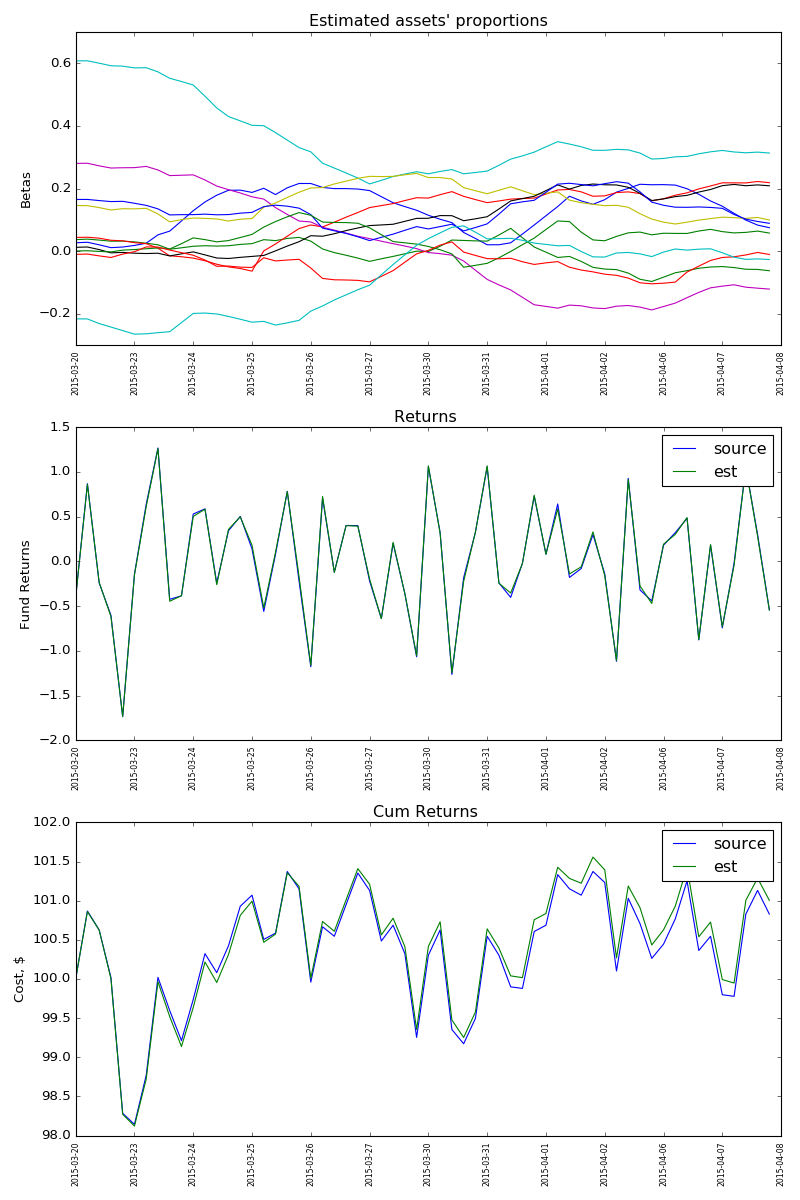

In [8]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


time =  range(T)
outPoint = np.zeros([T,1])
#outPoint[26,0] = outPoint[39,0] = outPoint[41,0] = outPoint[47,0] = outPoint[49,0] = 1
fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
n = np.size(assets,1)
T = np.size(assets,0)

beta, fund_est = nsr.nonstatRegress(assets, fund, lam, outPoint,dynamic_model)
cumfund = nsr.CumReturn(fund)
cumfund_est = nsr.CumReturn(fund_est)

for t in range(0,T):
   print t, beta[t,0]

time =  range(T)
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.title("Estimated assets' proportions")
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
ax.set_ylabel('Betas')
#plt.subplot(3,1,2)
for i in range(0,n):
    plt.plot(time, beta[:,i])

plt.show()
# Plot  return
plt.subplot(3,1,2)
plt.title('Returns ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
ax.set_ylabel('Fund Returns')
plt.plot(time, fund, label='source' )
plt.plot(time, fund_est, label='est')
plt.tight_layout() 
plt.legend()
plt.show()
# Plot cumulative return
plt.subplot(3,1,3)
plt.title('Cum Returns ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, cumfund, label='source' )
plt.plot(time, cumfund_est, label='est')
ax.set_ylabel('Cost, $')
plt.tight_layout() 
plt.legend()
plt.show()

### Step 6.1 Leave one out procedure  for smoothness adjustment

### Step 7. Akaike information criterion  for smoothness adjustment with known observation variance 

<IPython.core.display.Javascript object>


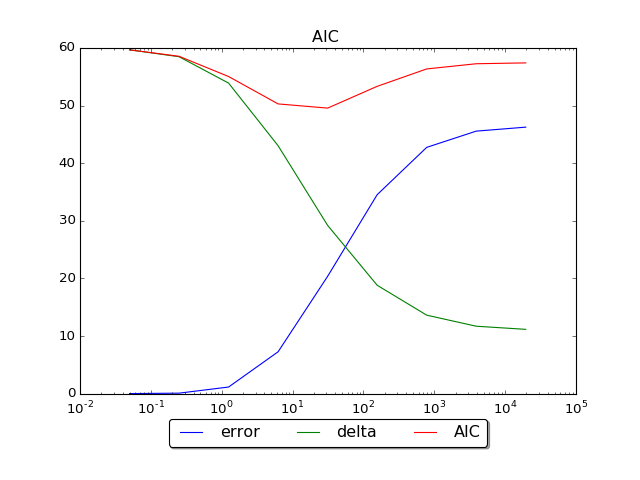

In [26]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
lam_arr = []
lam = 0.01
while lam <=5000:
    lam = lam*5
    lam_arr.append(lam)


r2_lam_arr = []
tr_lam_arr = []
arr = []
for lam in lam_arr:
     r2_lam, trace_lam = nsr.AIC(assets,fund,lam,dynamic_model)
     r2_lam_arr.append(r2_lam*30)
     tr_lam_arr.append(trace_lam)
#print  r2_lam_arr   
plt.figure()
plt.title('AIC ')
ax = plt.gca()
ax.set_xscale('log')
new_r2_lam_arr = [x *T  for x in  r2_lam_arr]
tr_lam_arr = [x for x in  tr_lam_arr]
aic = [x +y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
plt.plot(lam_arr,new_r2_lam_arr, label='error')
plt.plot(lam_arr,tr_lam_arr, label='delta')
plt.plot(lam_arr,aic, label='AIC')
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)

# KVASOVS!

In [35]:
import pandas as pd
import numpy as np
import scipy as sc
import Regress as nsr
import math
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [269]:
dynamic_model = 0

In [16]:
# set smoothness
lam = 0.99
# indicies
index_array = np.arange(12)
index_array = np.array([1,2,3,4,5,6,7,8,9,10,11])
# set model matrix
dynamic_model = 0
import time
import matplotlib.gridspec as gridspec

from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
majorLocator = MultipleLocator(5)

T,n = assetstbl.shape
# fund
fnum = 0

time =  range(T)
fnums = np.arange(20)
fnames = fundnames #shorten names not needed (but 108 symbols long)

In [171]:
#outPoint[26,0] = outPoint[39,0] = outPoint[41,0] = outPoint[47,0] = outPoint[49,0] = 1
fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
n = np.size(assets,1)
T = np.size(assets,0)
time =  range(T)
outPoint = np.zeros([T,1])

beta, fund_est = nsr.nonstatRegress(assets, fund, lam, outPoint,dynamic_model)
cumfund = nsr.CumReturn(fund)
cumfund_est = nsr.CumReturn(fund_est)

<IPython.core.display.Javascript object>


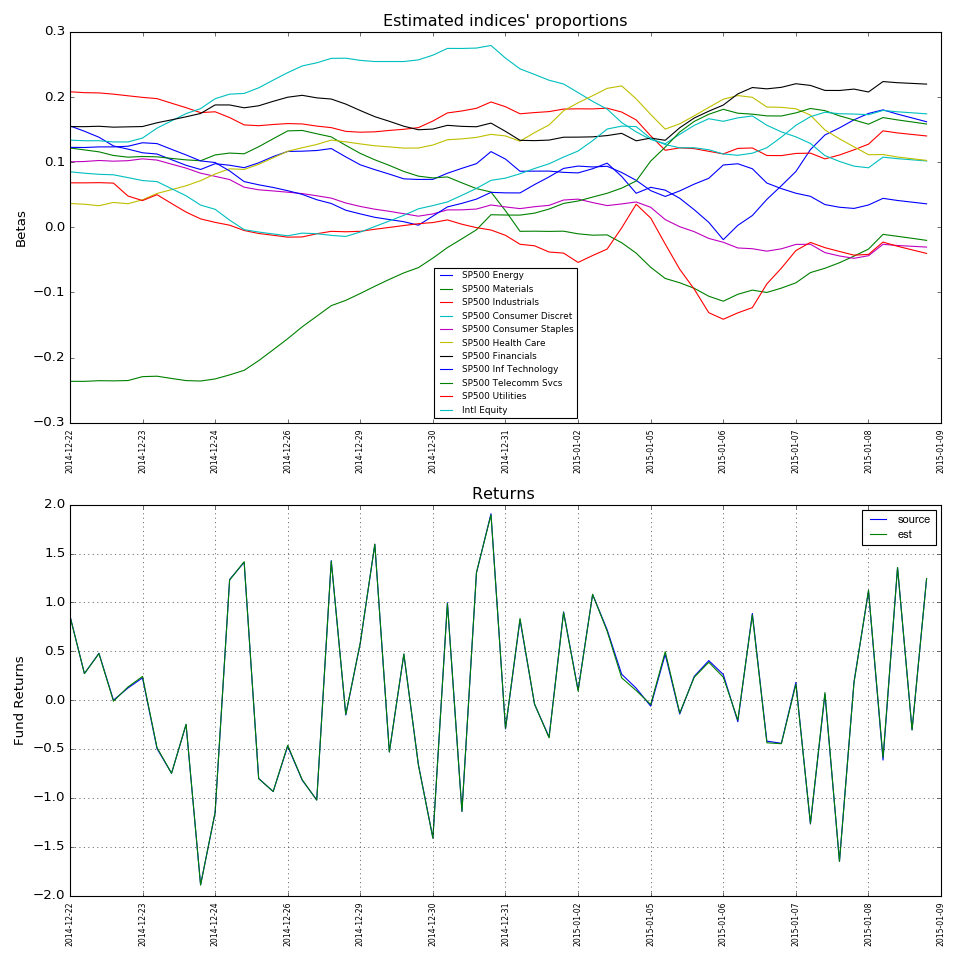

In [172]:
time =  range(T)
fig = plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("Estimated indices' proportions")
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
ax.set_ylabel('Betas')
for i in range(0,n):
    plt.plot(time, beta[:,i], label=assetnames[i+1])
plt.legend(fontsize=8, loc='lower centre')

# Plot  return
plt.subplot(2,1,2)
plt.title('Returns ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
ax.set_ylabel('Fund Returns')
ax.grid('on')
plt.plot(time, fund, label='source' )
add_it = np.asarray(assetsall[:,0])*(1-np.sum(beta, axis=1)).reshape(-1, 1)
plt.plot(time, fund_est + add_it, label='est')
plt.tight_layout() 
plt.legend(fontsize=10)
plt.show()
# # Plot cumulative return
# plt.subplot(3,1,3)
# plt.title('Cum Returns ')
# plt.xticks(time, dates, rotation=90, size = 7)
# ax = plt.gca()
# ax.get_xaxis().set_tick_params(pad=5)
# ax.get_xaxis().set_major_locator(majorLocator)
# plt.plot(time, cumfund, label='source' )
# plt.plot(time, cumfund_est, label='est')
# ax.set_ylabel('Cost, $')
# plt.tight_layout() 
# plt.legend()
# plt.show()
fig.savefig('pic/'+'example_nsr'+'.png', dpi=200)

GOOD!

In [10]:
max_days = 60 #!!!
funds_to_test = [0, 1, 3, 5, 6, 8, 10, 12, 14, 16]
funds = fund_data_120.iloc[7:64, funds_to_test].values.astype(float)
assets = assets_data_120.iloc[2:59,:11].values.astype(float)#last one isn't in funds
assetnames = assets_data_120.columns.values[:11].astype(str)
dates = np.array([stri[:-9] for stri in fund_data_120.iloc[7:max_days+7].index.values.astype(str)])
fundnames = fund_data_120.iloc[:,funds_to_test].columns.values.astype(str)
#### Ограничения равенства
assetstbl = (assets - assets[:,0][:,np.newaxis])[:,1:]
fundstbl = funds - assets[:,0][:,np.newaxis]
####
assetsall = np.mat(assetstbl)
fundsall = np.mat(fundstbl)
smoothness = fund_data_120.iloc[2,funds_to_test].values.astype(float) 
turn_overs = overall_data.iloc[2].values.astype(float)[::3][funds_to_test]

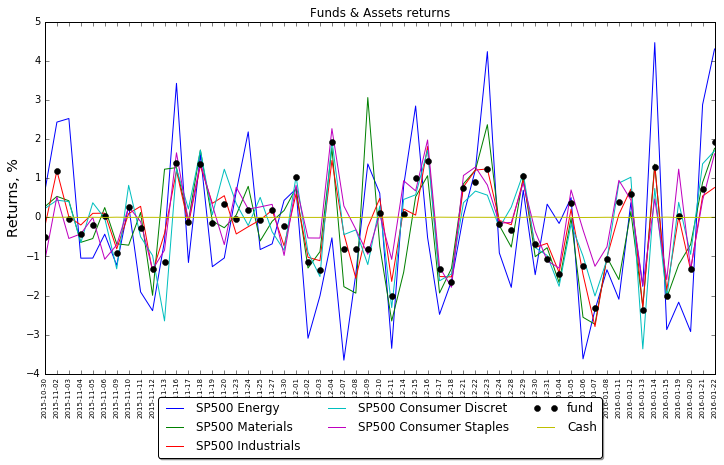

In [70]:
fnum = 0
plt.close("all")

time =  range(T)
#plt.subplot(3,1,1)
fig = plt.figure(figsize=(12,7)) 
plt.title('Funds & Assets returns')
plt.xticks(time, dates, rotation=90, size = 7)
ax = fig.gca()
ax.get_xaxis().set_tick_params(pad=3)
#ax.get_xaxis().set_major_locator(majorLocator)
ax.set_ylabel('Returns, %')
for i in range(1,6):
    ax.plot(time, assets[:,i], label = assetnames[i])
plt.plot(time, funds[:,2], 'o',label='fund', color='k')
plt.plot(time, assets[:,0], label = assetnames[0])
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
             box.width, box.height * 0.9])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3)
fig.savefig('pic/'+'assets'+'.pdf', format='pdf',dpi=200)
plt.show()

<IPython.core.display.Javascript object>


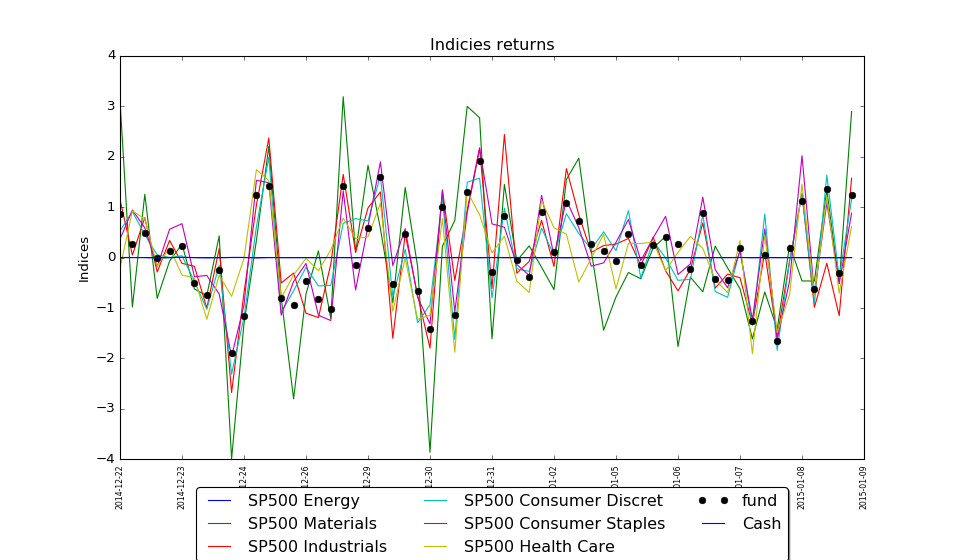

In [173]:
fnum = 0
plt.close("all")

time =  range(T)
#plt.subplot(3,1,1)
fig = plt.figure(figsize=(12,7)) 
plt.title('Indicies returns')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
ax.set_ylabel('Indices')
for i in range(0,6):
    ax.plot(time, assetsall[:,i], label = assetnames[i+1])
plt.plot(time, fundsall[:,fnum], 'o',label='fund')
plt.plot(time, assetsall[:,0], label = assetnames[0])
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
             box.width, box.height * 0.9])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=3)
fig.savefig('pic/'+'assets_:6'+'.png', dpi=200)
plt.show()

GOOD!

LOO

In [78]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as pyplot
majorLocator = MultipleLocator(5)

LOO_eig_min_r2 = []
for fn in range(fnum):
    outPoint = np.zeros([T,1])
    fund = fundsall[:,fnum]
    time =  range(T)

    r2_lam_arr_clear = []
    r2_lam_arr = []
    r2_lam_t = np.zeros([len(lam_arr),T]) 
    ilam = 0
    #outPoint[26,0] = outPoint[39,0] = outPoint[41,0] = outPoint[47,0] = outPoint[49,0] = 1
    for lam in lam_arr:
         r2_arr, r2_lam, fund_out = nsr.LeaveOneOut(assets,fund,lam,dynamic_model)
         beta_opt_lam, fund_est = nsr.nonstatRegress(assets,fund, lam, outPoint,dynamic_model) 
        # beta_opt_lam всегда последний
         r2_lam_t[ilam,:] = r2_arr.T
         err = fund_est - fund    
         r2_lam_clear = np.dot(err.T, err)

         r2_lam_arr.append(r2_lam)

         r2_lam_arr_clear.append(r2_lam_clear[0,0]/T) 
         #import ipdb; ipdb.set_trace() 
         ilam = ilam+1
    LOO_eig_min_r2 += [()]
#print  r2_lam_arr

In [120]:
argminlam

819.2

<IPython.core.display.Javascript object>


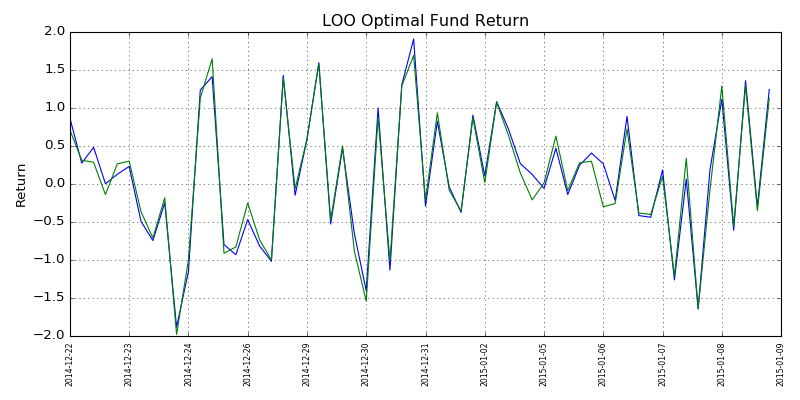

In [121]:
plt.close("all")


# plt.figure()
# plt.subplot(2,1,1)
# plt.title('Predicted R2 for different lambda ')
# ax = plt.gca()
# ax.grid()
# ax.set_xscale('log')
# ax.set_ylabel('R2')
# plt.plot(lam_arr,r2_lam_arr)


# plt.subplot(2,1,2)
# plt.title('Predicted R2 for different lambda at each time point')
# for t in range(1,T-1):
#     r2_t = r2_lam_t[:,t]
#     plt.plot(lam_arr,r2_t)
# ax = plt.gca()
# ax.grid()
# ax.set_ylabel('R2')
# ax.set_xscale('log')    



# # pyplot.matshow(r2_lam_t)


# argminlam  = lam_arr[np.argmin(r2_lam_arr)]

beta_opt_lam, fund_est = nsr.nonstatRegress(assets,fund, argminlam, outPoint,dynamic_model)
# plt.figure(figsize=(10,5))
# title = 'Optimal betas by lam = ' + str(argminlam) 
# plt.title(title)
# for i in range(0,n):
#     plt.plot(time, beta_opt_lam[:,i])
# plt.xticks(time, dates, rotation=90, size = 7)
# ax = plt.gca()
# ax.grid()
# ax.set_ylabel('Betas')
# ax.get_xaxis().set_tick_params(pad=5)
# ax.get_xaxis().set_major_locator(majorLocator)  
# plt.show()

# Plot  return
plt.figure(figsize=(10,5))
plt.title('LOO Optimal Fund Return')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.grid()
ax.set_ylabel('Return')
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, fund, label = 'source')
plt.plot(time, fund_est, label = 'estimated')
plt.tight_layout() 

plt.show()

Eigenvalues and LOO

In [6]:
LOO_eig_min_r2

[(0.032567580941296935, 6.4, 7),
 (0.089635624126153876, 819.2, 5),
 (0.014157036548683204, 25.6, 7),
 (0.087763931814024698, 819.2, 9),
 (0.047617258268062256, 3.2, 10),
 (0.020231288843388987, 819.2, 8),
 (0.0051376874727834289, 25.6, 10),
 (0.013644990388033049, 819.2, 8),
 (0.007718975099142494, 3.2, 10),
 (0.001445997692423189, 102.4, 8)]

In [9]:
lam_cross = []
lam = 0.1
while lam <=500:
    lam = lam*2
    lam_cross.append(lam)
    
lam_aic = []
lam = 0.01
while lam <=5000:
    lam = lam*5
    lam_aic.append(lam)

In [10]:
print [lam_cross[x[-1]] for x in LOO_eig_min_r2], [x[0] for x in LOO_eig_min_r2]
print [lam_aic[x[1]] for x in AIC_min_r2], [x[0] for x in AIC_min_r2]

[25.6, 6.4, 25.6, 102.4, 204.8, 51.2, 204.8, 51.2, 204.8, 51.2] [0.032567580941296935, 0.089635624126153876, 0.014157036548683204, 0.087763931814024698, 0.047617258268062256, 0.020231288843388987, 0.0051376874727834289, 0.013644990388033049, 0.007718975099142494, 0.001445997692423189]


NameError: name 'AIC_min_r2' is not defined

In [11]:
[lam_cross[x[1]] for x in LHO_min_r2], [x[0] for x in lHO_min_r2]

NameError: name 'LHO_min_r2' is not defined

In [119]:
lam_min =6.4

9 6.4 1000


<IPython.core.display.Javascript object>


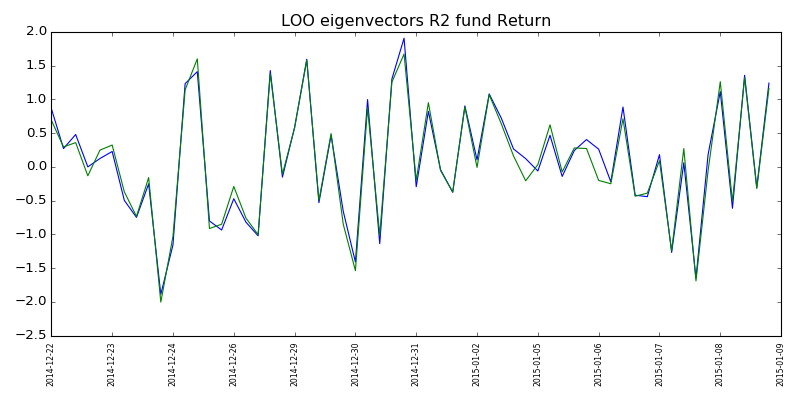

In [115]:
print m_min+1, lam_min, r2_min

assets_ort = eigenvec[:,range(0,m_min+1)]
beta_opt_lam, fund_est = nsr.nonstatRegress(assets_ort,fund, lam_min, outPoint,dynamic_model)
# plt.figure(figsize=(10,5))
# title = 'Optimal betas by lam = ' + str(lam_min) + ' and factor number ' + str(m_min+1) 
# plt.title(title)
# for i in range(0,m_min+1):
#     plt.plot(time, beta_opt_lam[:,i])
# plt.xticks(time, dates, rotation=90, size = 7)
# ax = plt.gca()
# ax.get_xaxis().set_tick_params(pad=5)
# ax.get_xaxis().set_major_locator(majorLocator)  
# plt.show()
plt.close('all')
# Plot  return
plt.figure(figsize=(10,5))
plt.title('LOO eigenvectors R2 fund Return')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, fund)
plt.plot(time, fund_est)
plt.tight_layout() 

plt.show()

### Turn Over

LeaveHalfOut

In [526]:
fnum = 7; T = N; time =  range(T)

lam_arr = []
lam = 0.01
while lam <=5000:
    lam = lam*2
    lam_arr.append(lam)

In [527]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)
outPoint = np.zeros([T,1])
dynamic_model = 0

band = 10
LHO_min_r2 = []
r2_lam_arr_fund = []
for fn in range(fnum):
    fund = fundsall[:,fn]
    r2_lam_arr = []

    r2_lam_t = np.zeros([len(lam_arr),T]) 
    ilam = 0
    for lam in lam_arr:
         r2_arr, r2_lam, fund_out = nsr.LeaveHalfOut(assetsall,fund,lam,dynamic_model)
         r2_lam_t[ilam,:] = r2_arr.T    
         r2_lam_arr.append(r2_lam)
         ilam = ilam+1
    LHO_min_r2 += [(np.min(r2_lam_arr),np.argmin(r2_lam_arr))]
    r2_lam_arr_fund += [r2_lam_arr]
#print  r2_lam_arr   

In [422]:
LHO_min_r2

[(0.28012892169323472, 7),
 (0.0099224575649950828, 8),
 (0.011522160392240858, 14),
 (0.020403201521510348, 11),
 (0.017750127035572785, 10),
 (0.0095481505618639894, 13),
 (0.033468171784939056, 9)]

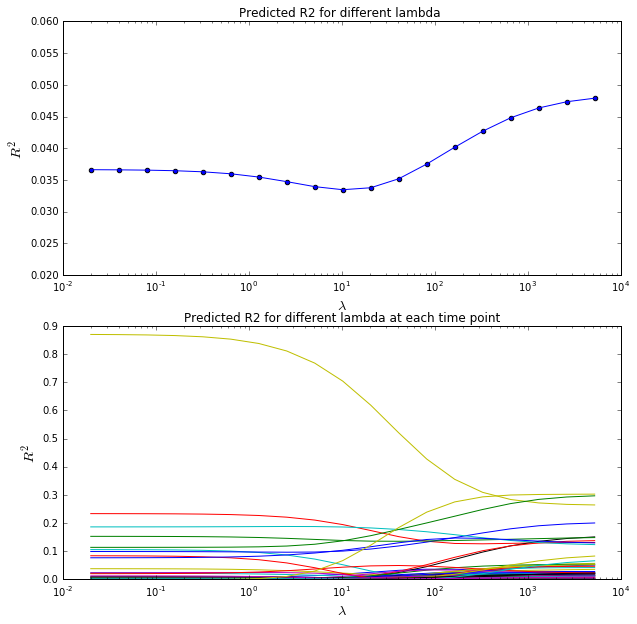

In [423]:
plt.figure()

plt.subplot(2,1,1)
plt.title('Predicted R2 for different lambda ')
ax = plt.gca()
ax.set_xscale('log')
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"$R^2$")
plt.scatter(lam_arr,r2_lam_arr)
plt.plot(lam_arr,r2_lam_arr)

plt.subplot(2,1,2)
plt.title('Predicted R2 for different lambda at each time point')
for t in range(1,T-1):
    r2_t = r2_lam_t[:,t]
    plt.plot(lam_arr,r2_t)
ax = plt.gca()
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"$R^2$")
ax.set_xscale('log')    


#pyplot.matshow(r2_lam_t)

Fund number:  1
1319.90315867
29.3333333333


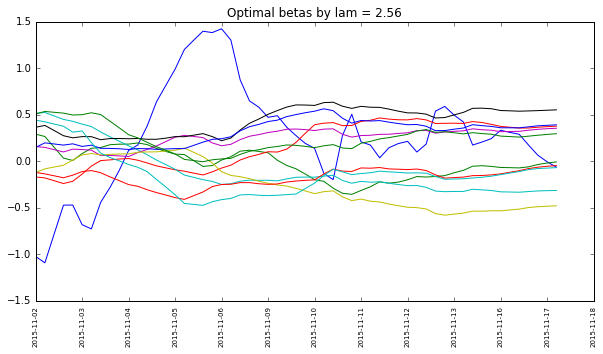

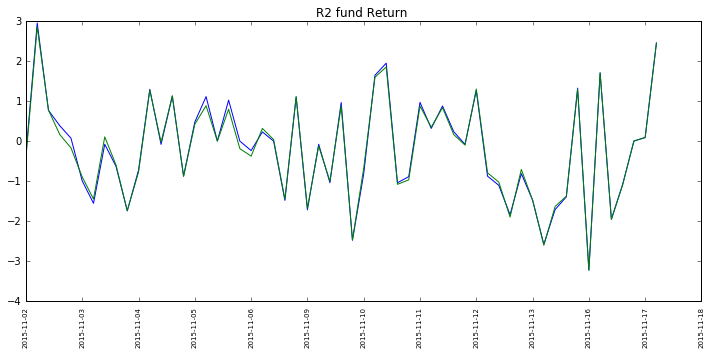

Fund number:  2
254.565562005
12.5


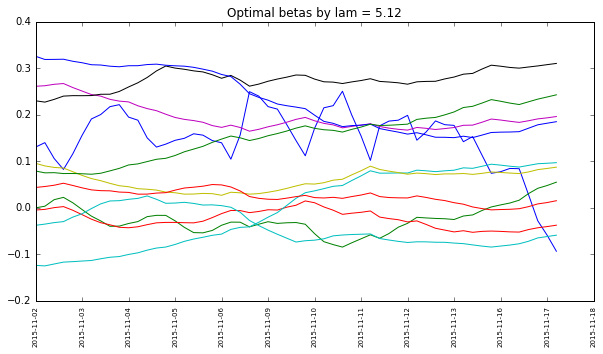

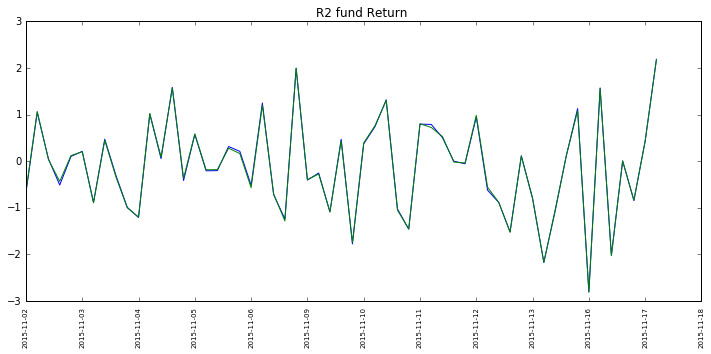

Fund number:  3
36.3802881289
16.8333333333


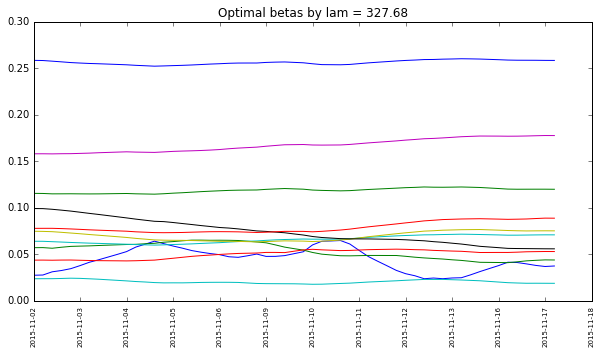

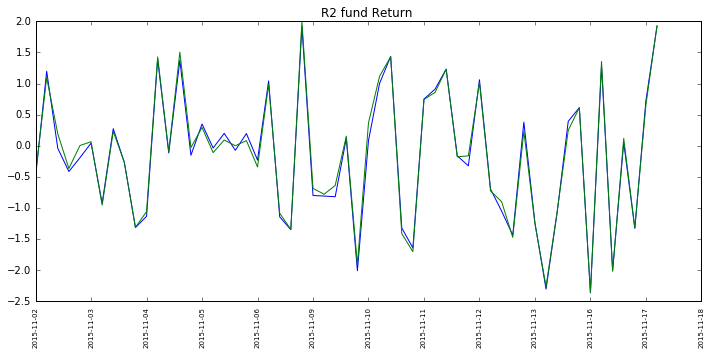

Fund number:  4
114.115490708
9.83333333333


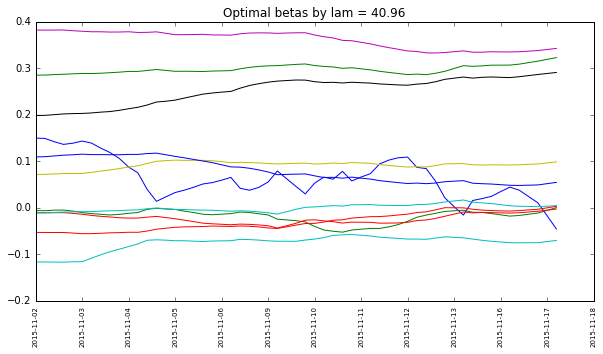

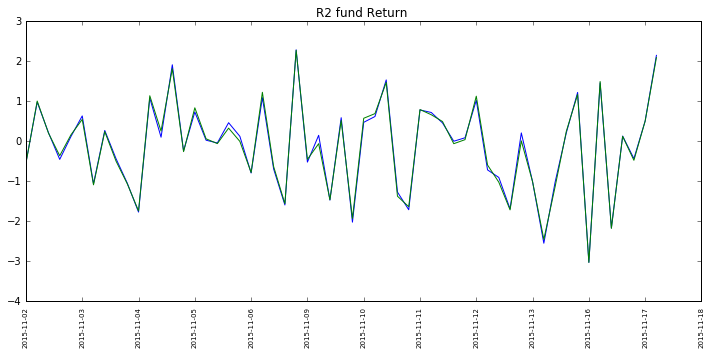

Fund number:  5
154.529325238
12.3333333333


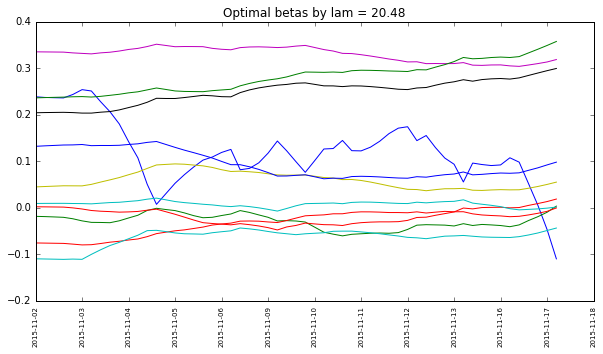

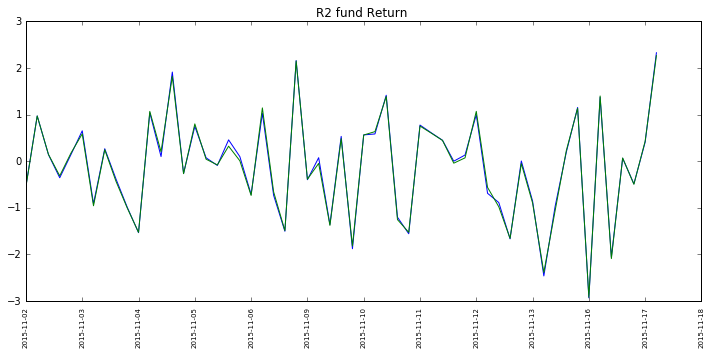

Fund number:  6
39.9112092382
58.0


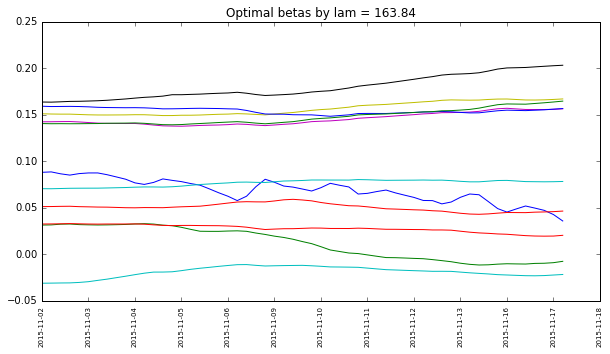

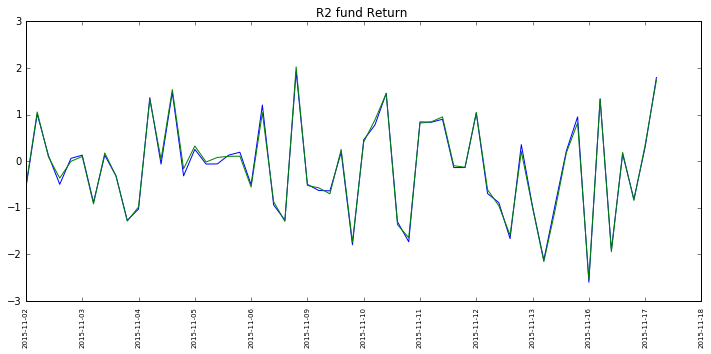

Fund number:  7
315.174709307
9.33333333333


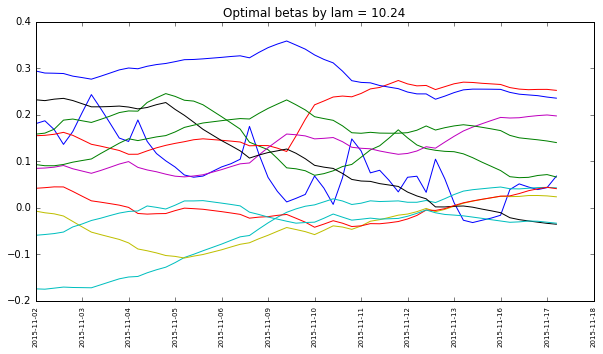

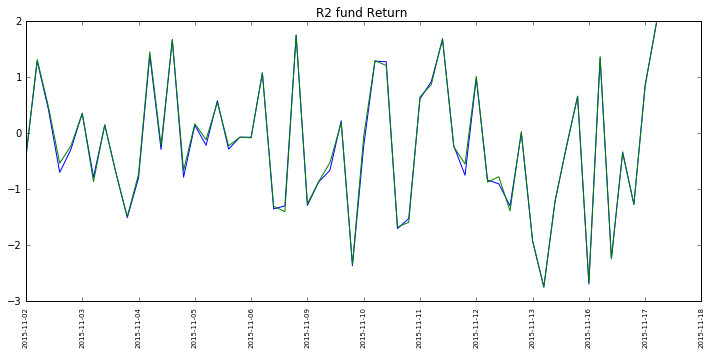

In [525]:
LHO_tov = []
for fn in range(fnum):
    lam_min = lam_arr[LHO_min_r2[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    print("Fund number: ", fn+1)
    print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    LHO_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
    print(turn_overs[fn]/6)
    #print(beta_opt_lam[:, 0])
    
    plt.figure(figsize=(10,5))
    title = 'Optimal betas by lam = ' + str(lam_min)
    plt.title(title)
    plt.plot(time, beta_opt_lam)
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)  
    plt.show()

    # Plot  return
    plt.figure(figsize=(10,5))
    plt.title('R2 fund Return ')
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)
    plt.plot(time, fund)
    plt.plot(time, fund_est)
    plt.tight_layout() 

    plt.show()

AIC

In [528]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


AIC_min_r2 = []
aic_r2_lam_arr_fund = []
for fn in range(fnum):
    fund = fundsall[:,fn]
    r2_lam_arr = []
    tr_lam_arr = []
    arr = []
    for lam in lam_arr:
         r2_lam, trace_lam = nsr.AIC(assetsall,fund,lam,dynamic_model)
         r2_lam_arr.append(r2_lam*30)
         tr_lam_arr.append(trace_lam)
    new_r2_lam_arr = [x *T  for x in  r2_lam_arr]
    tr_lam_arr = [x for x in  tr_lam_arr]
    aic = [x + y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
    #print([(aic[i], lam_arr[i]) for i in range(len(lam_arr))])
    
    AIC_min_r2 +=  [(np.min(aic), np.argmin(aic))]  
    aic_r2_lam_arr_fund += [aic]
#print  r2_lam_arr   
# plt.figure()
# plt.title('AIC ')
# ax = plt.gca()
# ax.set_xscale('log')
# new_r2_lam_arr = [x *T  for x in  r2_lam_arr]
# tr_lam_arr = [x for x in  tr_lam_arr]
# aic = [x +y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
# plt.plot(lam_arr,new_r2_lam_arr, label='error')
# plt.plot(lam_arr,tr_lam_arr, label='delta')
# plt.plot(lam_arr,aic, label='AIC')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=3)

In [494]:
def turn_over(beta, fund, assets, accurate=True):
    if accurate:
        nomin = np.sum(np.sum(np.abs(beta[1:] - (assets[1:]/100 + 1)/(fund[1:, np.newaxis]/100 + 1)*beta[:-1]), axis=1)*
                   np.cumprod(1 + fund/100, axis=0)[1:])
        return nomin*fund.shape[0]/np.sum(np.cumprod(1+fund/100, axis=0))
    return np.sum(np.abs(beta[1:] - beta[:-1]))

In [490]:
[(AIC_min_r2[i][0], lam_arr[AIC_min_r2[i][1]]) for i in range(7)][0]

IndexError: list index out of range

In [529]:
AIC_tov = []

Fund number:  1
1690.17688851
29.3333333333


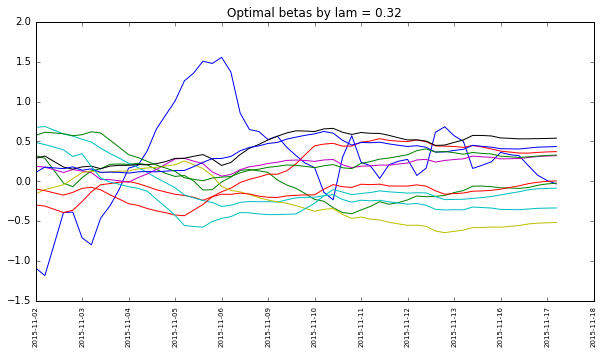

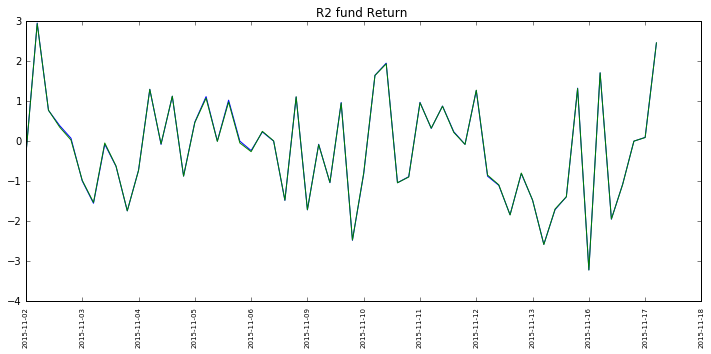

Fund number:  2
34.5650538269
12.5


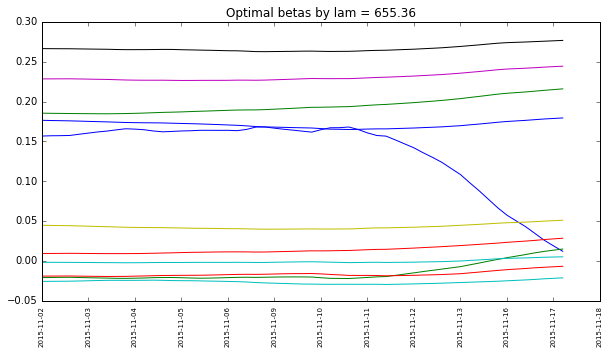

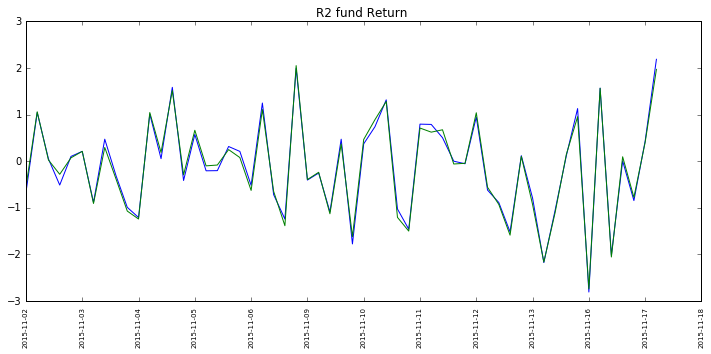

Fund number:  3
23.1742579288
16.8333333333


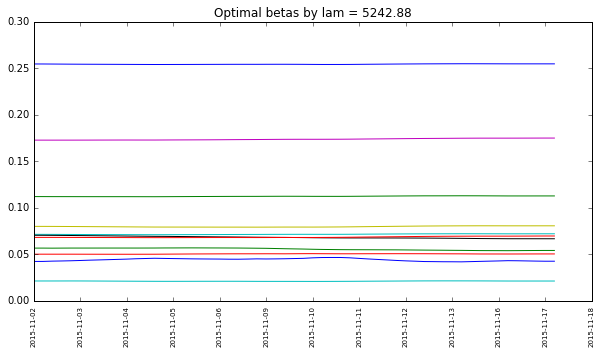

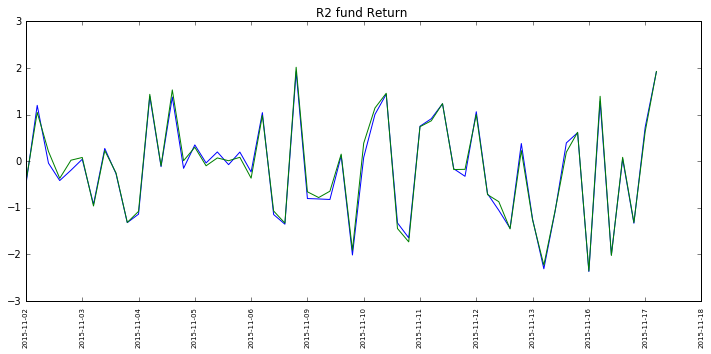

Fund number:  4
28.8073663781
9.83333333333


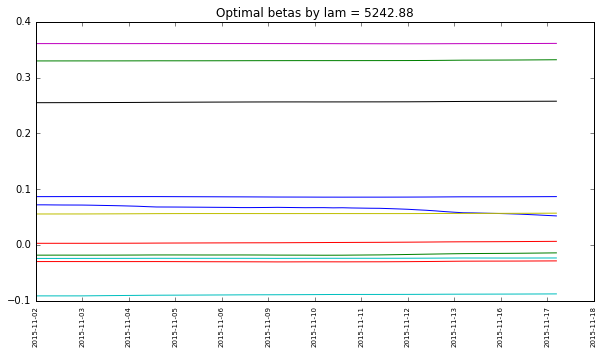

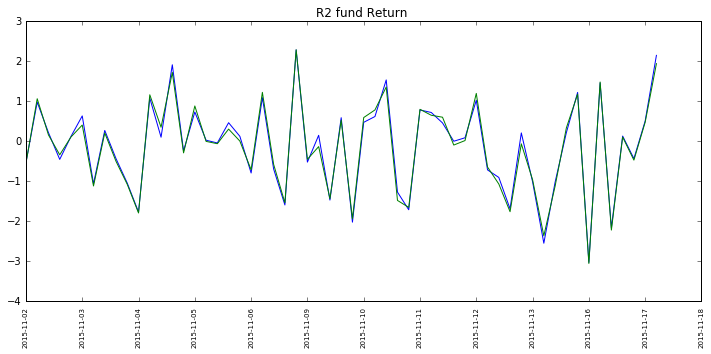

Fund number:  5
46.5183125603
12.3333333333


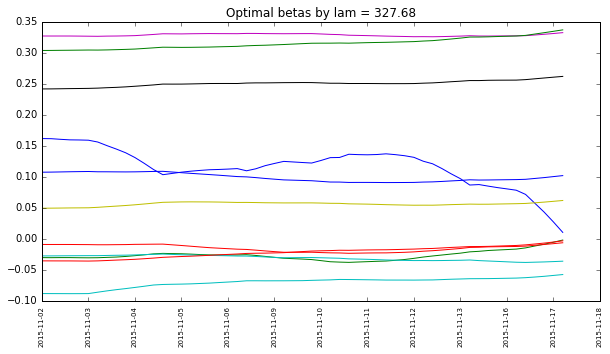

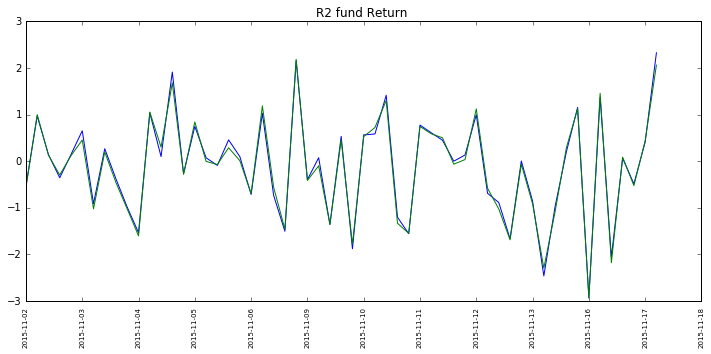

Fund number:  6
21.2116315713
58.0


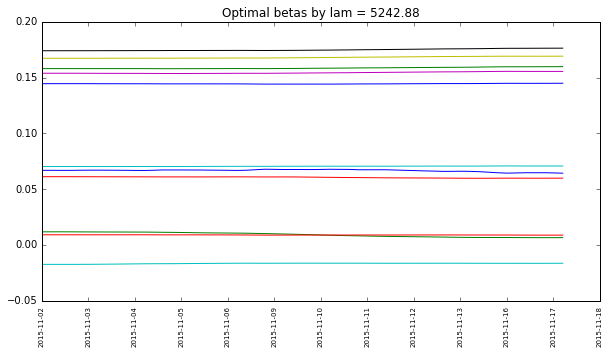

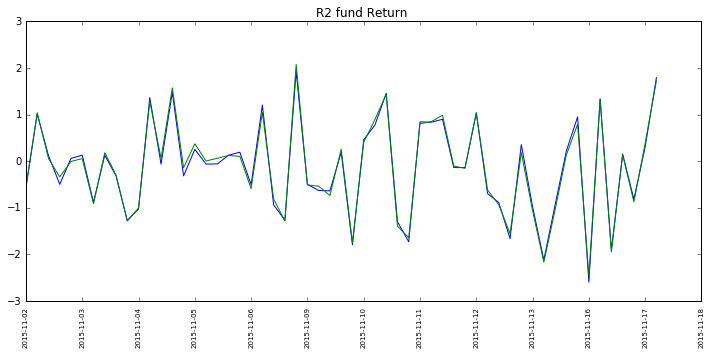

Fund number:  7
315.174709307
9.33333333333


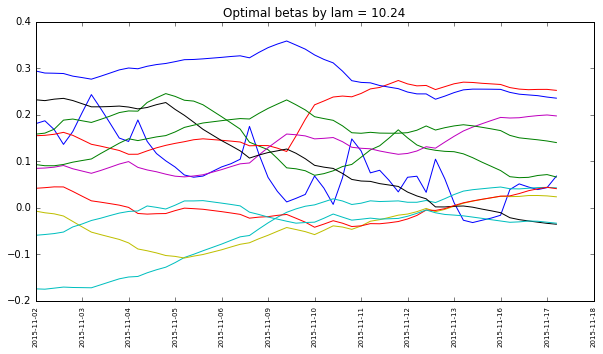

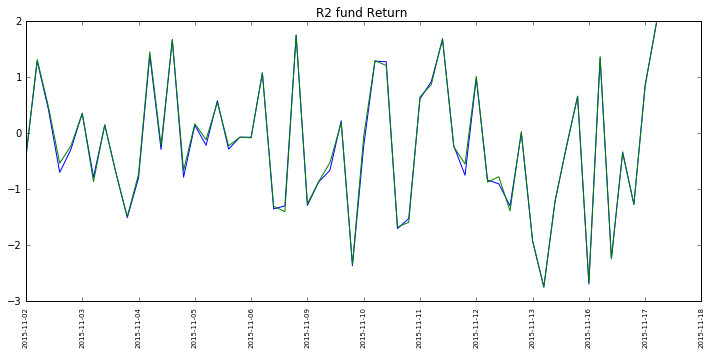

In [530]:
for fn in range(len(evid_list_full)):
    lam_min = lam_arr[AIC_min_r2[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    print("Fund number: ", fn+1)
    print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    print(turn_overs[fn]/6)
    AIC_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
    #print(beta_opt_lam[:, 0])
    
    plt.figure(figsize=(10,5))
    title = 'Optimal betas by lam = ' + str(lam_min)
    plt.title(title)
    plt.plot(time, beta_opt_lam)
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)  
    plt.show()

    # Plot  return
    plt.figure(figsize=(10,5))
    plt.title('R2 fund Return ')
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)
    plt.plot(time, fund)
    plt.plot(time, fund_est)
    plt.tight_layout() 

    plt.show()

### Evidence

In [379]:
[(lam_list_full[fn][-1], delta_list_full[fn][-1]) for fn in range(7)]

[(21063.879535846394, 2.7922560637848375),
 (237.80877179369446, 81.119859886025552),
 (42889.085704657147, 72.471524090983181),
 (24418.129824422391, 56.375306251946512),
 (368.26854481074912, 65.726845221276164),
 (10874.210167845475, 107.96270995781438),
 (20478.147467904542, 25.148228547298263)]

In [531]:
Evid_tv = []

Fund number:  1
51.1077914529
29.3333333333


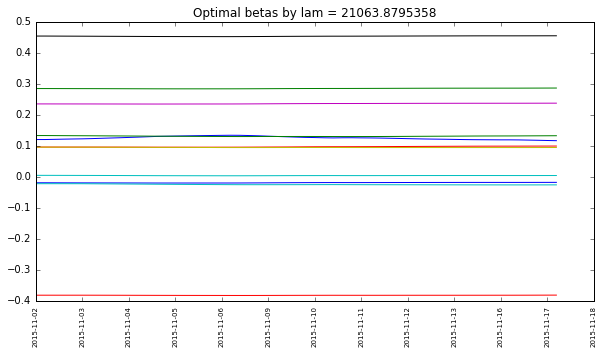

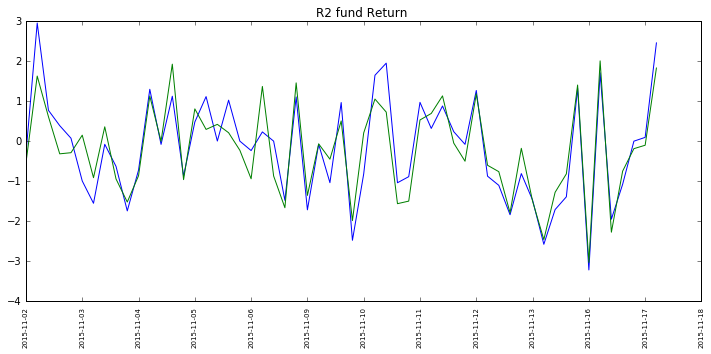

Fund number:  2
45.5825177328
12.5


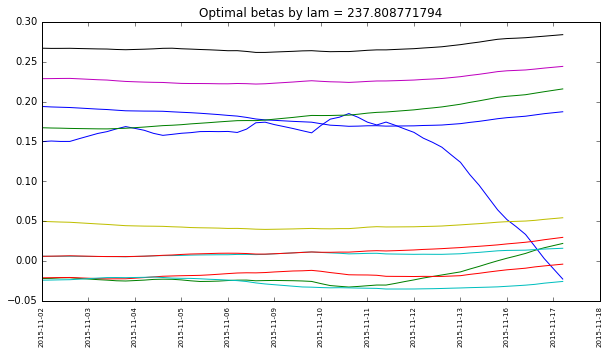

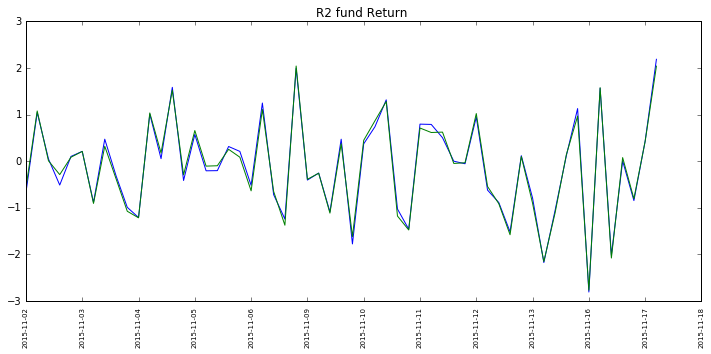

Fund number:  3
24.1419629204
16.8333333333


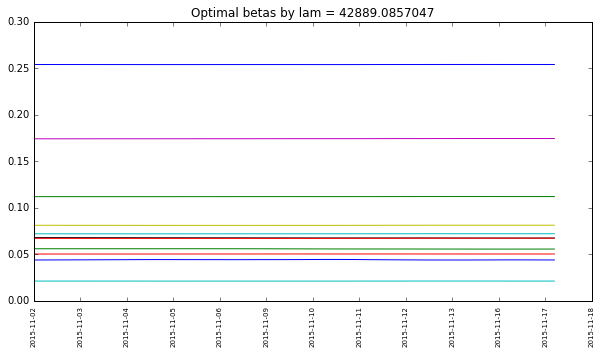

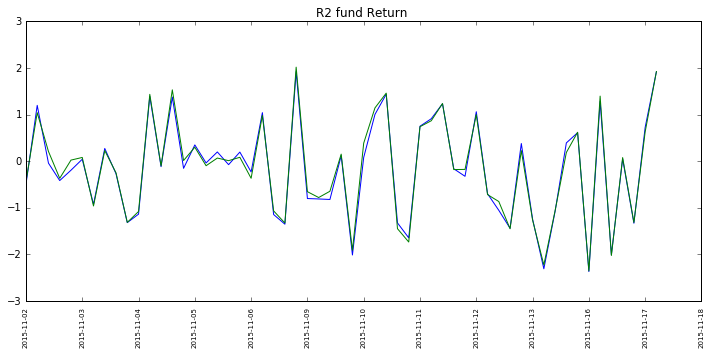

Fund number:  4
29.8931059054
9.83333333333


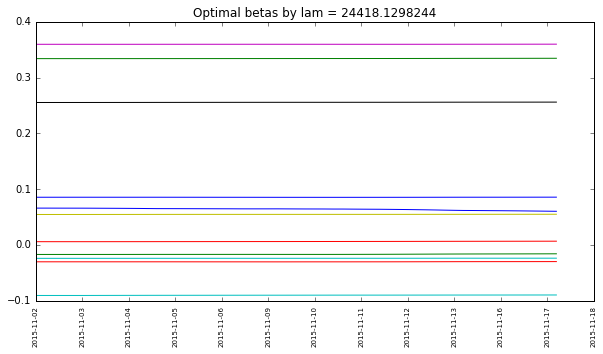

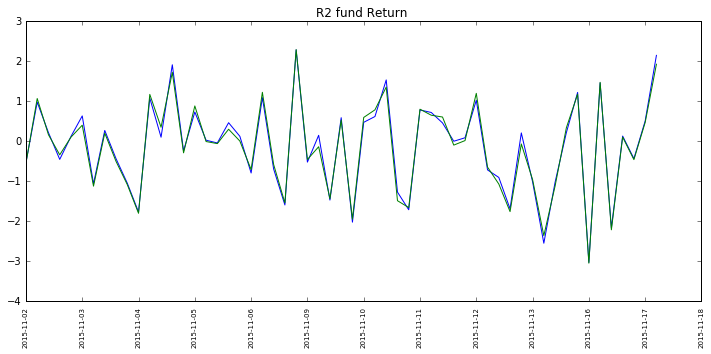

Fund number:  5
45.293411136
12.3333333333


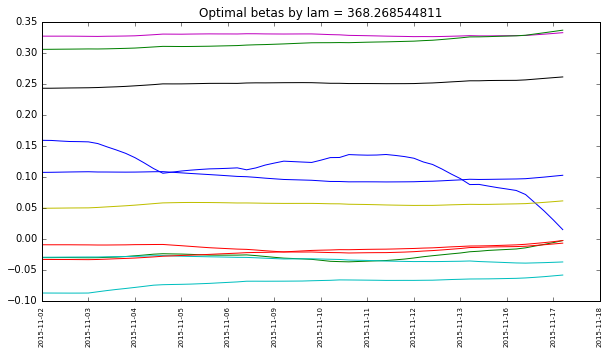

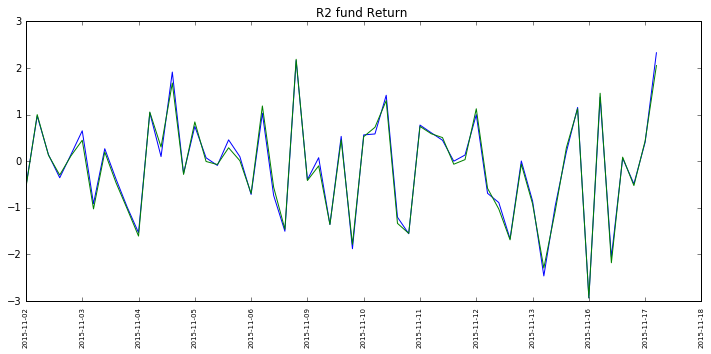

Fund number:  6
22.349124161
58.0


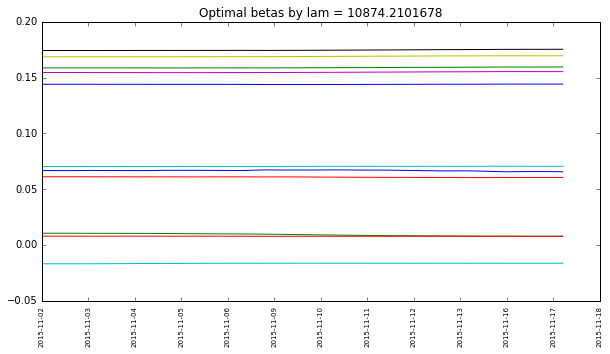

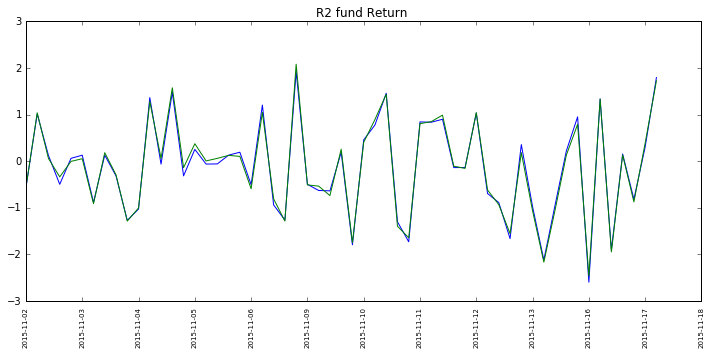

Fund number:  7
30.5751495512
9.33333333333


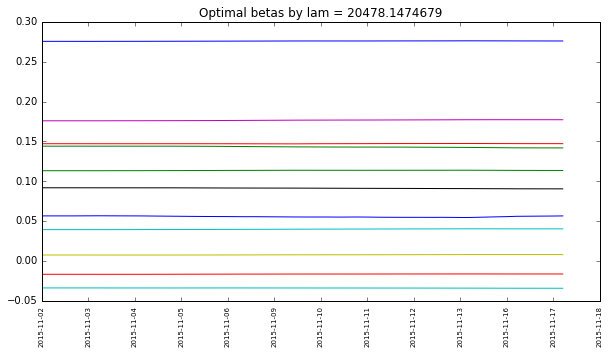

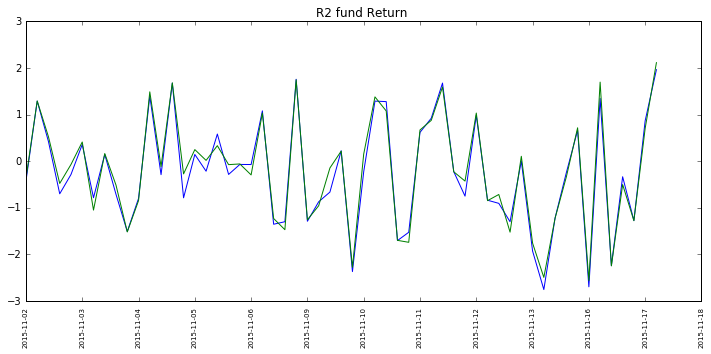

In [532]:
for fn in range(len(evid_list_full)):
    lam_min = lam_list_full[fn][-1]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    print("Fund number: ", fn+1)
    print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100)
    Evid_tv += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100]
    print(turn_overs[fn]/6)
    #print(beta_opt_lam[:, 0])
    
    plt.figure(figsize=(10,5))
    title = 'Optimal betas by lam = ' + str(lam_min)
    plt.title(title)
    plt.plot(time, beta_opt_lam)
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)  
    plt.show()

    # Plot  return
    plt.figure(figsize=(10,5))
    plt.title('R2 fund Return ')
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)
    plt.plot(time, fund)
    plt.plot(time, fund_est)
    plt.tight_layout() 

    plt.show()

In [389]:
%store AIC_min_r2

Stored 'AIC_min_r2' (list)


In [390]:
%store LHO_min_r2

Stored 'LHO_min_r2' (list)


In [533]:
LHO_tov

[1319.903158668388,
 254.56556200510997,
 36.380288128922828,
 114.11549070822706,
 154.52932523757735,
 39.911209238207299,
 315.17470930692843]

In [534]:
AIC_tov

[1690.1768885120164,
 34.565053826900531,
 23.17425792882722,
 28.807366378062348,
 46.5183125603169,
 21.211631571284283,
 315.17470930692843]

In [536]:
Evid_tv

[51.107791452940788,
 45.582517732761112,
 24.141962920420632,
 29.893105905433821,
 45.293411136049961,
 22.349124160990559,
 30.575149551193025]

In [541]:
np.sqrt(np.sum((turn_overs[:7] - np.array(LHO_tov))**2))

1231.4815699427459

In [542]:
np.sqrt(np.sum((turn_overs[:7] - np.array(AIC_tov))**2))

1573.5477389196285

## Step 10. Just one fund

In [354]:
max_days = 60 #!!!
funds_to_test = [0, 1, 3, 5, 6, 8, 10, 12, 14, 16]
funds = fund_data_120.iloc[7:64, funds_to_test].values.astype(float)
assets = assets_data_120.iloc[2:59,:11].values.astype(float)#last one isn't in funds
assetnames = assets_data_120.columns.values[:11].astype(str)
dates = np.array([stri[:-9] for stri in fund_data_120.iloc[7:max_days+7].index.values.astype(str)])
fundnames = fund_data_120.iloc[:,funds_to_test].columns.values.astype(str)
#### Ограничения равенства
assetstbl = (assets - assets[:,0][:,np.newaxis])[:,1:]
fundstbl = funds - assets[:,0][:,np.newaxis]
####
assetsall = np.mat(assetstbl)
fundsall = np.mat(fundstbl)
smoothness = fund_data_120.iloc[2,funds_to_test].values.astype(float) 
turn_overs = overall_data.iloc[2].values.astype(float)[::3][funds_to_test]

In [355]:
turn_overs[4]
fundnames[4]

'AB Large Cap Growth A'

In [356]:
raw_funds = fund_data_120.iloc[7:64, funds_to_test].values.astype(float)
raw_assets = assets_data_120.iloc[2:59,:11].values.astype(float)#last one isn't in funds

In [357]:
N, n = assetstbl.shape
U = np.zeros((N, n, n))
V = np.zeros((N, n, n))
for i in range(1, N):
    U[i] = np.eye(n)
    V[i] = np.eye(n)
X = np.zeros((N*n, N))
for i in range(N):
    X[n*i:n*(i+1), i] = assetstbl[i]
    

In [166]:
def get_B_rho(V, rho=0.01):
    N, n = V.shape[0], V.shape[-1]
    B = np.zeros((N*n, N*n))
    for i in range(N):
        if i == 0:
            B[n*i:n*(i+1), n*i:n*(i+1)] = rho*np.eye(n) + np.dot(V[i+1].T,V[i+1])
        elif i == N-1:
            B[n*i:n*(i+1), n*i:n*(i+1)] = np.eye(n)
        else:
            B[n*i:n*(i+1), n*i:n*(i+1)] = np.eye(n) + np.dot(V[i+1].T,V[i+1])
        if i >= 1:
            B[n*i:n*(i+1), n*(i-1):n*i] = -V[i]
            B[n*(i-1):n*i, n*i:n*(i+1)] = -V[i].T
    return B

# def get_Q(X, U, V, lam, B=None):
#     N, n = U.shape[0], U.shape[-1]
#     if B is None:
#         B = get_B(U, V)
#     return np.dot(X, X.T) + lam*B

def get_bar_beta(y, X,V, lam, B=None):
    from scipy import linalg
    if B is None:
        B = get_B_rho(U, V)
    return linalg.solve(lam*B+np.dot(X, X.T), np.dot(X, y))

# def get_E(y, X, beta, U, V, lam, B=None):
#     if B is None:
#         B = get_B(U, V)
#     return 0.5*(np.dot((y-np.dot(X.T, beta)).T, y-np.dot(X.T, beta)) + 
#                 lam*np.dot(np.dot(beta.T, B), beta))#np.sum(beta*get_B(U, V)*beta.T)) #

In [149]:
B_rho = get_B_rho(V, rho=0.01)

print(np.allclose(B_rho.T, B_rho))

B_rho_1 = np.linalg.inv(B_rho)
print(np.allclose(B_rho_1.T, B_rho_1, atol = 1e-8))

print(np.linalg.det(B_rho) - 0.01**n)

True
True
-8.60800407175e-33


In [358]:
def log_evidence1(y, X, V, lam, delta=None, B_rho=None, verbose=False):
    from scipy import linalg
    N, n = V.shape[0], V.shape[-1]
    if B_rho is None:
        B_rho = get_B_rho(U, V)
    XBX = np.dot(X.T, np.dot(np.linalg.inv(B_rho), X))
    #beta_min = get_beta_min(y, X, U, V, lam, B)
    #E = get_E(y, X, beta_min, U, V, lam, B)
    #Q = get_Q(X, U, V, lam, B)
    (sign_ln_det, val_ln_det) = np.linalg.slogdet(np.eye(N) + 1/lam*XBX)
    log_det_IXBX = sign_ln_det * val_ln_det
    #log_D = np.sum(np.linalg.slogdet(U[1:])[0]*np.linalg.slogdet(U[1:])[1])
    #print(beta_min.shape)
    #print(E)
    #if delta is None:
    #    const = (N*(n+1)/2-n)*(np.log(N*(n+1)-2*n)-np.log(2*np.pi)-1)
    #    return (N-1)*n/2*np.log(lam) -\
    #            (N*(n+1)/2-n)*np.log(2*E)-0.5*np.log(linalg.det(get_Q(X, U, V, lam))) + const
    const = -N/2*np.log(2*np.pi)
    #B = get_B(U, V)
    #print(np.sum(np.diagonal(B) == 0))
    #print("B det ", linalg.det(B))
    if verbose: 
        print(' N/2*np.log(delta) {:3.3}| -0.5*log_det_IXBX {:3.3}| Rest {:3.3}|'.format(
                N/2*np.log(delta), 
                 - 0.5*log_det_IXBX,
                 - delta/2*np.dot(y.T, np.dot(np.linalg.inv(np.eye(N) + 1/lam*XBX), y))))
    if np.any(sign_ln_det == -1):
        raise RuntimeError("Determinant bad sign: ", sign_ln_det)
    return const + N/2*np.log(delta)\
            - 0.5*log_det_IXBX - delta/2*np.dot(y.T, np.dot(np.linalg.inv(np.eye(N) + 1/lam*XBX), y))
    
def iterate_log_evidence1(evid_list, lam_list, delta_list, y, X, V, lam=None, delta=None, verbose=False):
    import time
    fl = 1
    lam = 0.1 if lam is None else lam
    delta = 0.1 if delta is None else delta
    B_rho = get_B_rho(V)
    #bar_beta = get_bar_beta(y, X, V, lam, B_rho)
    XBX = np.dot(X.T, np.dot(np.linalg.inv(B_rho), X))
    mus = np.linalg.eigvals(XBX).real
    if (np.sum(np.linalg.eigvals(XBX).imag)):
        print("Smth Bad with eigvals")
    cnt = 0
    tm = time.time()
    cur_tm = tm
    while(fl):
        cnt +=1 
        bar_beta = get_bar_beta(y, X, V, lam, B_rho)
        ## beta
        delta = N/(np.sum(y*y)-np.dot((np.dot(X, y)).T, bar_beta))
        ## beta -> m_N, gamma
        #alpha
        lam = np.sum(mus/(mus+lam))/(delta*np.dot(bar_beta.T, np.dot(B_rho, bar_beta)))
        #m_N
        lam_list += [lam]
        #evid
        evid_list += [log_evidence1(y, X, V, lam, delta, B_rho)]
        delta_list += [delta] #np.allclose(lam_list[-1], lam_list[-2], rtol=0, atol=1e-8) and np.allclose(delta_list[-1], delta_list[-2], rtol=0, atol=1e-8 ))
        if (cnt != 1 and (np.allclose(evid_list[-1], evid_list[-2], rtol=0, atol=1e-6) or cnt >= 10000)) :
            break
        #print(time.time()-tm)
        cur_tm = time.time() - tm
        if verbose:
            print("Time: {}, iter: {}, lambda: {}, delta: {}".format(cur_tm, cnt, lam, delta))
    print("Time: {}, iter: {}, lambda: {}, delta: {}".format(cur_tm, cnt, lam, delta))

In [359]:
evid_list_full2 = []
lam_list_full2 = []
delta_list_full2 = []

In [360]:
# tmpstmp = []
# evid_list_full = []
# lam_list_full = []
# delta_list_full = []
import time
#for i in range(1):
tm = time.time()
# evid_list = []
# lam_list = []
# delta_list = []
for fn in range(0, 10):
    evid_list = []
    lam_list = []
    delta_list = []
    y = fundstbl[:, fn]
    iterate_log_evidence1(evid_list, lam_list, delta_list, y, X, V, verbose=False)

    evid_list_full2 += [evid_list]
    lam_list_full2 += [lam_list]
    delta_list_full2 += [delta_list]
    print("Fund number {0:}, time {1}".format(fn,time.time() - tm))
    tm = time.time()
# tmpstmp += [time.time() - tm]

Time: 11.902321577072144, iter: 128, lambda: 873.4301169368201, delta: 3.1189704338125672
Fund number 0, time 12.319039821624756
Time: 18.608426094055176, iter: 216, lambda: 92.60634735678194, delta: 89.64585407814056
Fund number 1, time 19.059977531433105
Time: 10.509103298187256, iter: 120, lambda: 137.5344578364002, delta: 85.45213821225839
Fund number 2, time 10.849095344543457
Time: 13.003929376602173, iter: 133, lambda: 86.22687186389794, delta: 69.59296298530124
Fund number 3, time 13.243796348571777
Time: 12.423320293426514, iter: 149, lambda: 57.70269314778963, delta: 95.72114261330474
Fund number 4, time 12.581696271896362
Time: 19.951249599456787, iter: 185, lambda: 99.29804079999344, delta: 136.48494214953632
Fund number 5, time 20.064698457717896
Time: 18.489896774291992, iter: 246, lambda: 266.20158000992683, delta: 29.722140942298243
Fund number 6, time 18.59368133544922


KeyboardInterrupt: 

### Turn Over Anayses

In [192]:
def turn_over(beta, fund, assets, accurate=True):
    if accurate:
        nomin = np.sum(np.sum(np.abs(beta[1:] - (assets[1:]/100 + 1)/(fund[1:, np.newaxis]/100 + 1)*beta[:-1]), axis=1)*
                   np.cumprod(1 + fund/100, axis=0)[1:])
        return nomin*fund.shape[0]/np.sum(np.cumprod(1+fund/100, axis=0))
    return np.sum(np.abs(beta[1:] - beta[:-1]))

In [193]:
fnum = 10; T = N; time =  range(T)

lam_arr = []
lam = 0.01
while lam <=5000:
    lam = lam*2
    lam_arr.append(lam)

In [196]:
lam_arr

[0.02,
 0.04,
 0.08,
 0.16,
 0.32,
 0.64,
 1.28,
 2.56,
 5.12,
 10.24,
 20.48,
 40.96,
 81.92,
 163.84,
 327.68,
 655.36,
 1310.72,
 2621.44,
 5242.88]

In [229]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as pyplot
majorLocator = MultipleLocator(5)

outPoint = np.zeros([T,1])
time =  range(T)
LOO_min_r2 = []
for fn in range(fnum):
    fund = fundsall[:,fn]

    #r2_lam_arr_clear = []
    r2_lam_arr = []
    #r2_lam_t = np.zeros([len(lam_arr),T]) 
    ilam = 0
    #outPoint[26,0] = outPoint[39,0] = outPoint[41,0] = outPoint[47,0] = outPoint[49,0] = 1
    for lam in lam_arr:
         r2_arr, r2_lam, fund_out = nsr.LeaveOneOut(assetsall,fund,lam,dynamic_model)
         #beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam, outPoint,dynamic_model) 
        # beta_opt_lam всегда последний
         #r2_lam_t[ilam,:] = r2_arr.T
         #err = fund_est - fund    
         #r2_lam_clear = np.dot(err.T, err)

         r2_lam_arr.append(r2_lam)

         #r2_lam_arr_clear.append(r2_lam_clear[0,0]/T) 
         #import ipdb; ipdb.set_trace() 
         #ilam = ilam+1
    print("Fund: ", fn)
    LOO_min_r2 += [(np.min(r2_lam_arr),np.argmin(r2_lam_arr))]
#print  r2_lam_arr

Fund:  0
Fund:  1
Fund:  2
Fund:  3
Fund:  4
Fund:  5
Fund:  6
Fund:  7
Fund:  8
Fund:  9


In [ ]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)
outPoint = np.zeros([T,1])
dynamic_model = 0

band = 10
LHO_min_r2 = []
r2_lam_arr_fund = []
for fn in range(fnum):
    fund = fundsall[:,fn]
    r2_lam_arr = []

    r2_lam_t = np.zeros([len(lam_arr),T]) 
    ilam = 0
    for lam in lam_arr:
         r2_arr, r2_lam, fund_out = nsr.LeaveHalfOut(assetsall,fund,lam,dynamic_model)
         r2_lam_t[ilam,:] = r2_arr.T    
         r2_lam_arr.append(r2_lam)
         ilam = ilam+1
    LHO_min_r2 += [(np.min(r2_lam_arr),np.argmin(r2_lam_arr))]
    r2_lam_arr_fund += [r2_lam_arr]
#print  r2_lam_arr   

In [92]:
LHO_min_r2

[(0.28010019568625122, 0),
 (0.0099071409338986807, 1),
 (0.011566195646708377, 7),
 (0.020413977513929121, 5),
 (0.017700856042803272, 4),
 (0.0095616559772840216, 7),
 (0.033547375876659909, 3)]

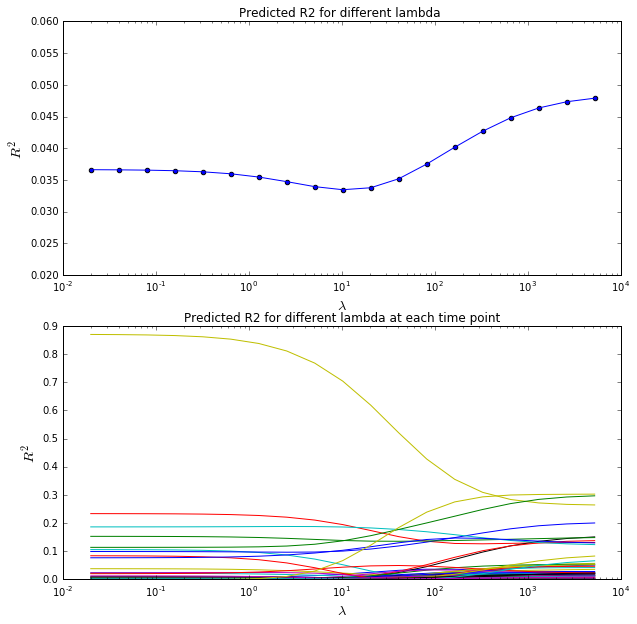

In [423]:
plt.figure()

plt.subplot(2,1,1)
plt.title('Predicted R2 for different lambda ')
ax = plt.gca()
ax.set_xscale('log')
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"$R^2$")
plt.scatter(lam_arr,r2_lam_arr)
plt.plot(lam_arr,r2_lam_arr)

plt.subplot(2,1,2)
plt.title('Predicted R2 for different lambda at each time point')
for t in range(1,T-1):
    r2_t = r2_lam_t[:,t]
    plt.plot(lam_arr,r2_t)
ax = plt.gca()
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"$R^2$")
ax.set_xscale('log')    


#pyplot.matshow(r2_lam_t)

In [158]:
LHO_tov = []; LHO_beta_opt = []

In [159]:
for fn in range(fnum):
    lam_min = lam_arr[LHO_min_r2[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    LHO_beta_opt += [beta_opt_lam ]
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    print("Fund number: ", fn+1)
    print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    LHO_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
    print(turn_overs[fn]/6)
    #print(beta_opt_lam[:, 0])
    
#     plt.figure(figsize=(10,5))
#     title = 'Optimal betas by lam = ' + str(lam_min)
#     plt.title(title)
#     plt.plot(time, beta_opt_lam)
#     plt.xticks(time, dates, rotation=90, size = 7)
#     ax = plt.gca()
#     ax.get_xaxis().set_tick_params(pad=5)
#     ax.get_xaxis().set_major_locator(majorLocator)  
#     plt.show()

#     # Plot  return
#     plt.figure(figsize=(10,5))
#     plt.title('R2 fund Return ')
#     plt.xticks(time, dates, rotation=90, size = 7)
#     ax = plt.gca()
#     ax.get_xaxis().set_tick_params(pad=5)
#     ax.get_xaxis().set_major_locator(majorLocator)
#     plt.plot(time, fund)
#     plt.plot(time, fund_est)
#     plt.tight_layout() 

#     plt.show()

Fund number:  1
1319.90315867
29.3333333333
Fund number:  2
254.565562005
12.5
Fund number:  3
36.3802881289
16.8333333333
Fund number:  4
114.115490708
9.83333333333
Fund number:  5
154.529325238
12.3333333333
Fund number:  6
39.9112092382
58.0
Fund number:  7
315.174709307
9.33333333333
Fund number:  8
382.399280837
19.0
Fund number:  9
652.931875256
77.5
Fund number:  10
88.9641078215
10.3333333333


AIC

In [160]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


AIC_min_r2 = []
aic_r2_lam_arr_fund = []
for fn in range(fnum):
    fund = fundsall[:,fn]
    r2_lam_arr = []
    tr_lam_arr = []
    arr = []
    for lam in lam_arr:
         r2_lam, trace_lam = nsr.AIC(assetsall,fund,lam,dynamic_model)
         r2_lam_arr.append(r2_lam*30)
         tr_lam_arr.append(trace_lam)
    new_r2_lam_arr = [x *T  for x in  r2_lam_arr]
    tr_lam_arr = [x for x in  tr_lam_arr]
    aic = [x + y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
    #print([(aic[i], lam_arr[i]) for i in range(len(lam_arr))])
    
    AIC_min_r2 +=  [(np.min(aic), np.argmin(aic))]  
    aic_r2_lam_arr_fund += [aic]
#print  r2_lam_arr   
# plt.figure()
# plt.title('AIC ')
# ax = plt.gca()
# ax.set_xscale('log')
# new_r2_lam_arr = [x *T  for x in  r2_lam_arr]
# tr_lam_arr = [x for x in  tr_lam_arr]
# aic = [x +y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
# plt.plot(lam_arr,new_r2_lam_arr, label='error')
# plt.plot(lam_arr,tr_lam_arr, label='delta')
# plt.plot(lam_arr,aic, label='AIC')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=3)

In [490]:
[(AIC_min_r2[i][0], lam_arr[AIC_min_r2[i][1]]) for i in range(7)][0]

IndexError: list index out of range

In [161]:
AIC_tov = []; AIC_beta_opt = []

In [162]:
for fn in range(fnum):
    lam_min = lam_arr[AIC_min_r2[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    AIC_beta_opt += [beta_opt_lam]
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    print("Fund number: ", fn+1)
    print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    print(turn_overs[fn]/6)
    AIC_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
    #print(beta_opt_lam[:, 0])
    
#     plt.figure(figsize=(10,5))
#     title = 'Optimal betas by lam = ' + str(lam_min)
#     plt.title(title)
#     plt.plot(time, beta_opt_lam)
#     plt.xticks(time, dates, rotation=90, size = 7)
#     ax = plt.gca()
#     ax.get_xaxis().set_tick_params(pad=5)
#     ax.get_xaxis().set_major_locator(majorLocator)  
#     plt.show()

#     # Plot  return
#     plt.figure(figsize=(10,5))
#     plt.title('R2 fund Return ')
#     plt.xticks(time, dates, rotation=90, size = 7)
#     ax = plt.gca()
#     ax.get_xaxis().set_tick_params(pad=5)
#     ax.get_xaxis().set_major_locator(majorLocator)
#     plt.plot(time, fund)
#     plt.plot(time, fund_est)
#     plt.tight_layout() 

#     plt.show()

Fund number:  1
1690.17688851
29.3333333333
Fund number:  2
34.5650538269
12.5
Fund number:  3
23.1742579288
16.8333333333
Fund number:  4
28.8073663781
9.83333333333
Fund number:  5
46.5183125603
12.3333333333
Fund number:  6
21.2116315713
58.0
Fund number:  7
315.174709307
9.33333333333
Fund number:  8
47.8242057561
19.0
Fund number:  9
652.931875256
77.5
Fund number:  10
63.1623117934
10.3333333333


### Evidence

In [ ]:
[(lam_list_full1[fn][-1], delta_list_full1[fn][-1]) for fn in range(10)]

In [168]:
Evid_tov = []; Evid_beta_opt = []

Fund number:  1
87.5226281201
29.3333333333


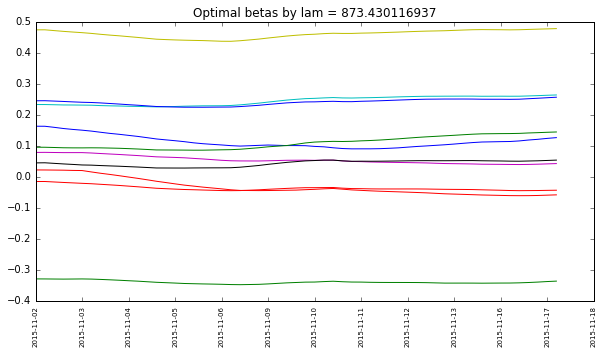

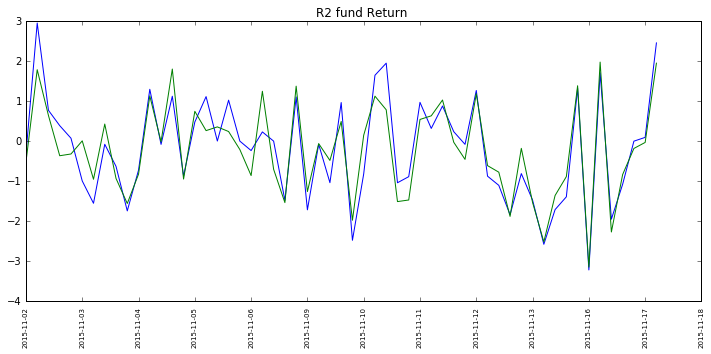

Fund number:  2
68.8113722033
12.5


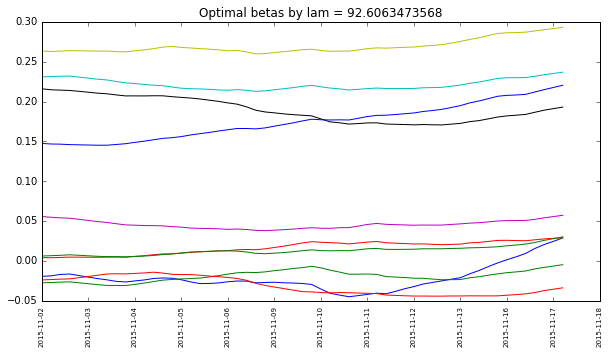

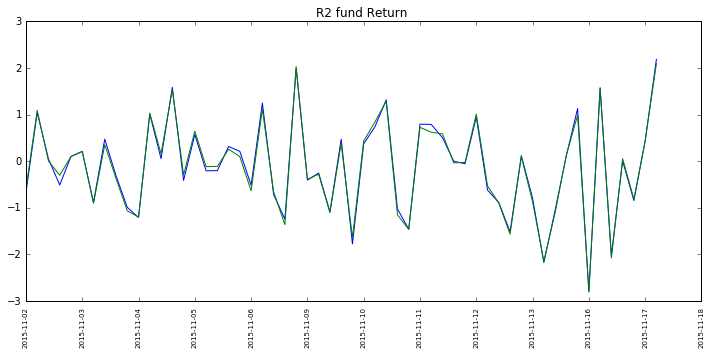

Fund number:  3
54.855579339
16.8333333333


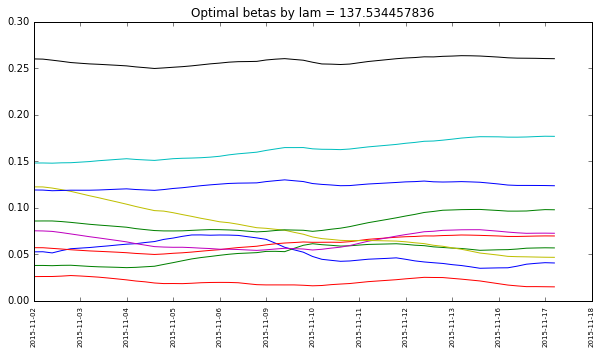

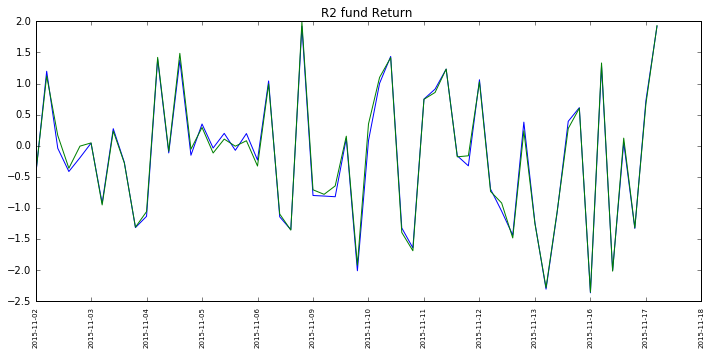

Fund number:  4
79.4105934315
9.83333333333


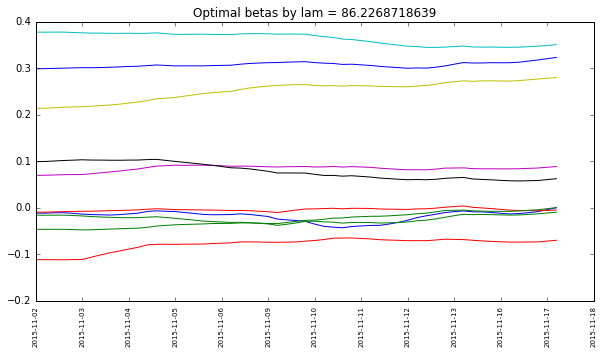

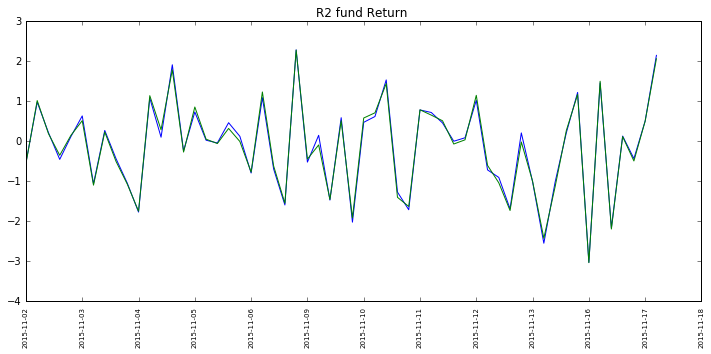

Fund number:  5
97.1080208974
12.3333333333


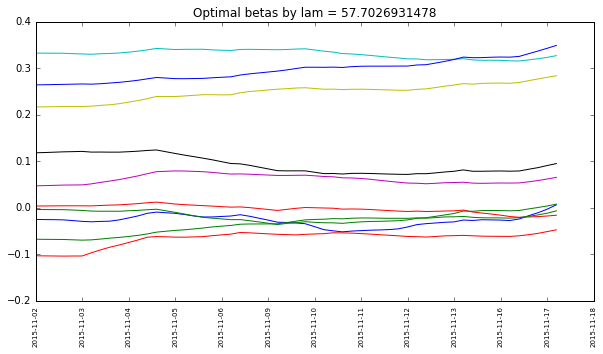

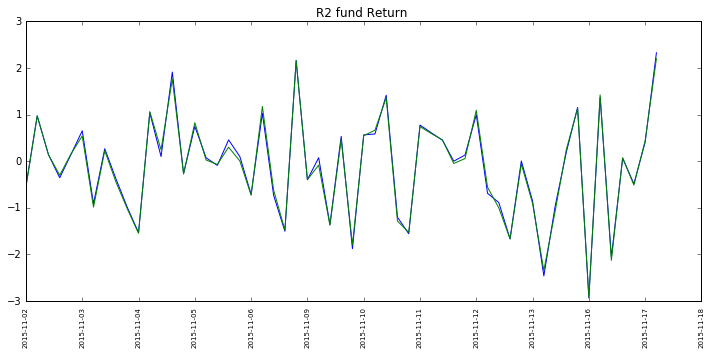

Fund number:  6
50.7691824056
58.0


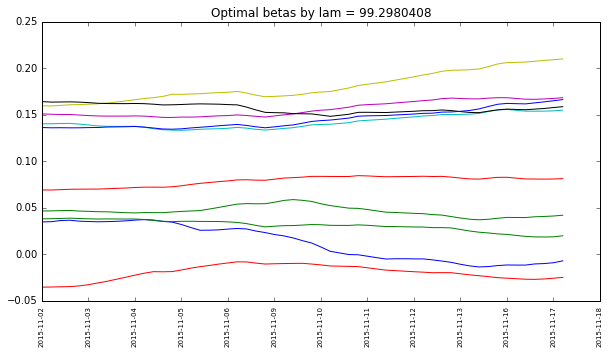

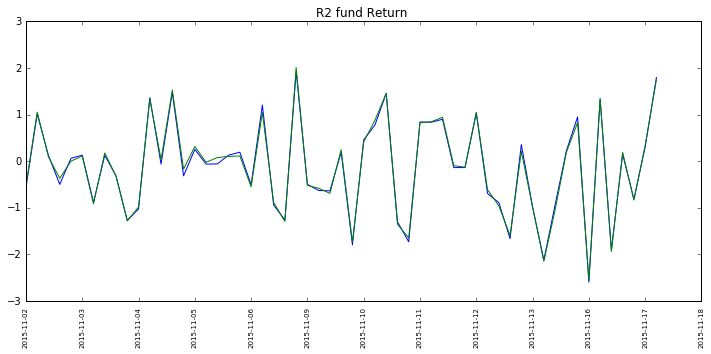

Fund number:  7
62.0310139866
9.33333333333


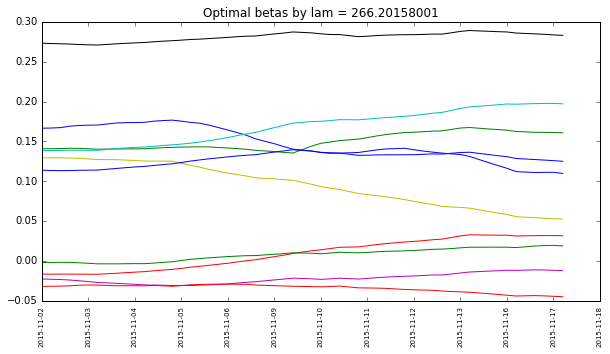

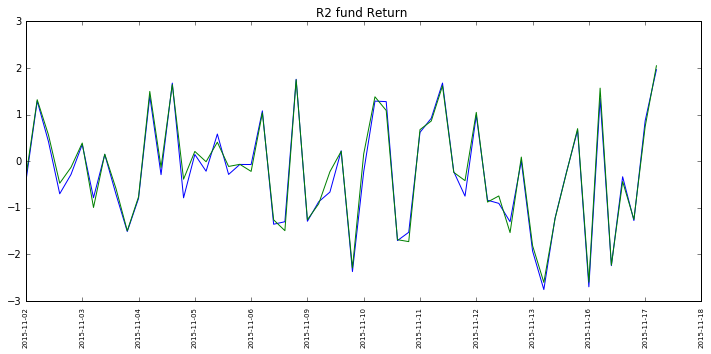

Fund number:  8
83.3873227658
19.0


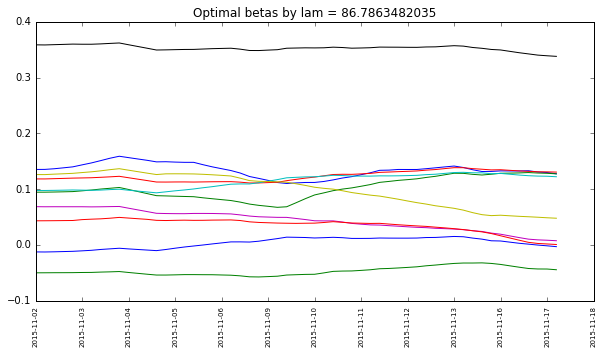

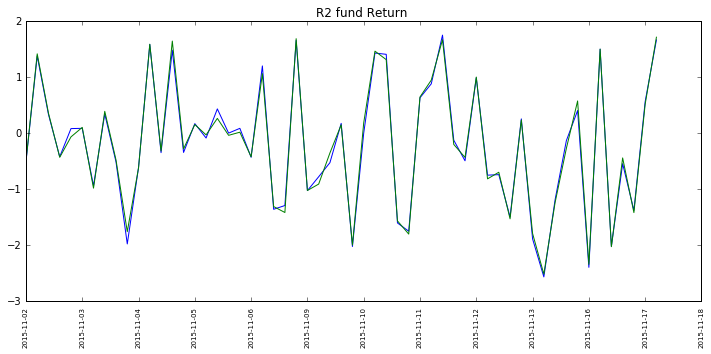

Fund number:  9
123.730303419
77.5


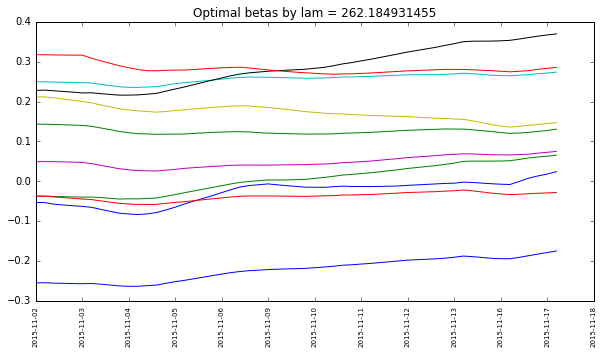

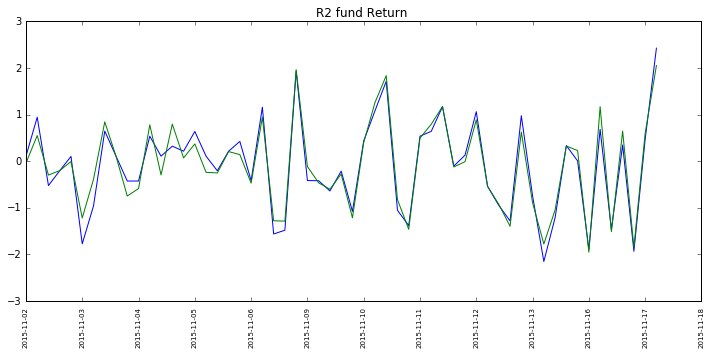

Fund number:  10
60.4134118005
10.3333333333


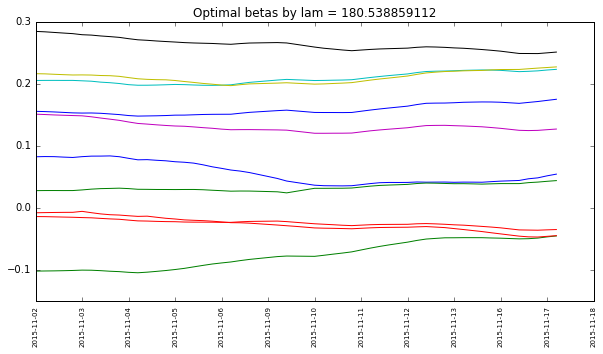

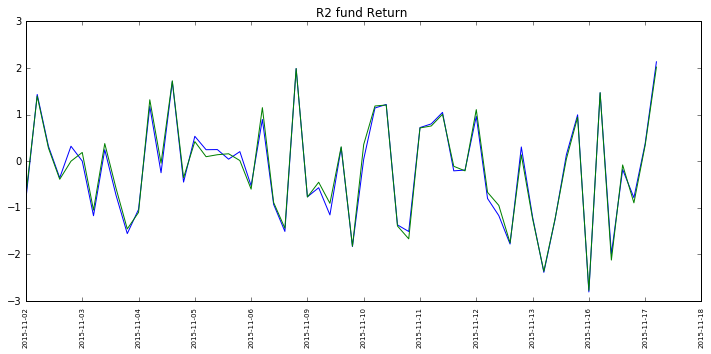

In [169]:
for fn in range(fnum):
    lam_min = lam_list_full1[fn][-1]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    Evid_beta_opt += [beta_opt_lam]
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    print("Fund number: ", fn+1)
    print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100)
    Evid_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100]
    print(turn_overs[fn]/6)
    #print(beta_opt_lam[:, 0])
    
    plt.figure(figsize=(10,5))
    title = 'Optimal betas by lam = ' + str(lam_min)
    plt.title(title)
    plt.plot(time, beta_opt_lam[:, 1:])
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)  
    plt.show()

    # Plot  return
    plt.figure(figsize=(10,5))
    plt.title('R2 fund Return ')
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)
    plt.plot(time, fund)
    plt.plot(time, fund_est)
    plt.tight_layout() 

    plt.show()

In [238]:
LOO_tov = []; LOO_beta_opt = []

In [245]:
[lam_arr[LOO_min_r2[i][1]] for i in range(10)]

[5242.88,
 327.68,
 5242.88,
 5242.88,
 5242.88,
 655.36,
 5242.88,
 163.84,
 40.96,
 5242.88]

Fund number:  1
53.9072488892
29.3333333333


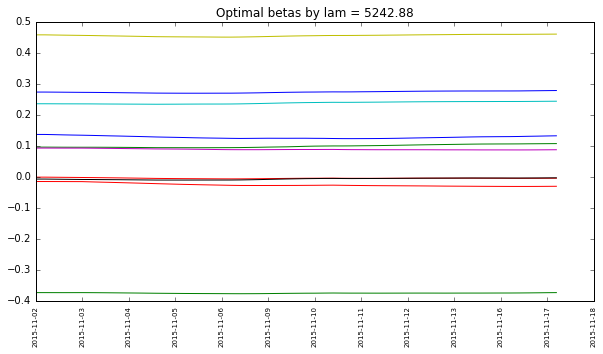

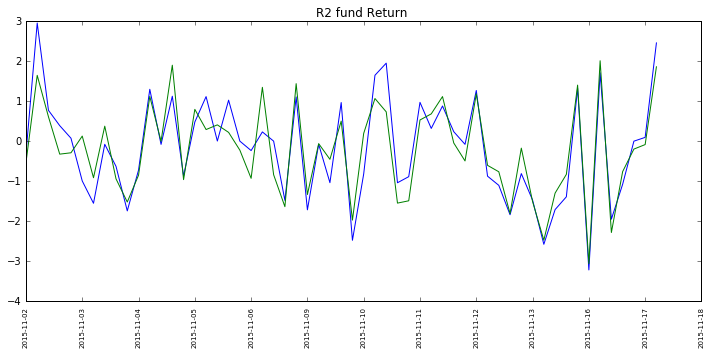

Fund number:  2
40.7152394361
12.5


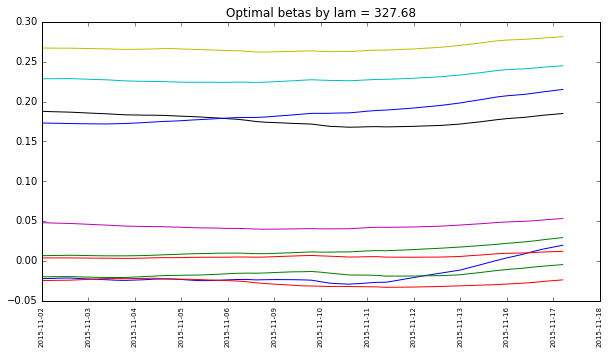

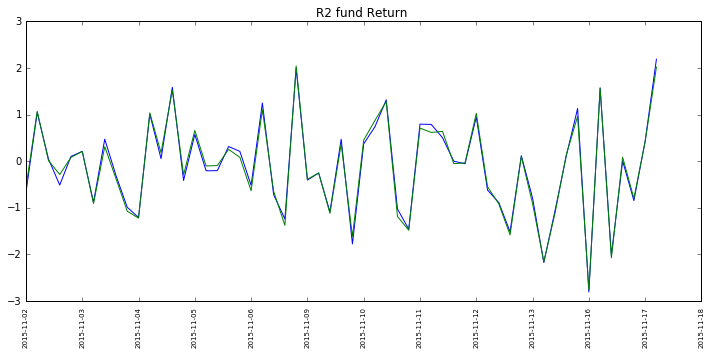

Fund number:  3
24.2889970011
16.8333333333


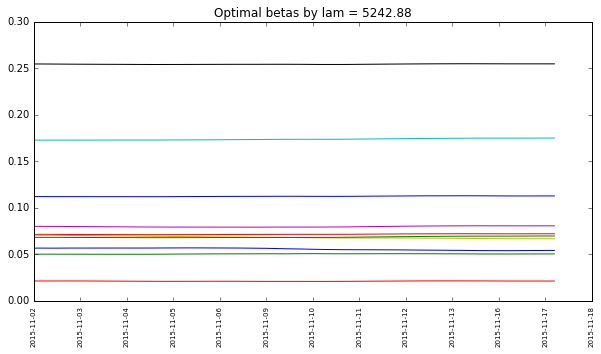

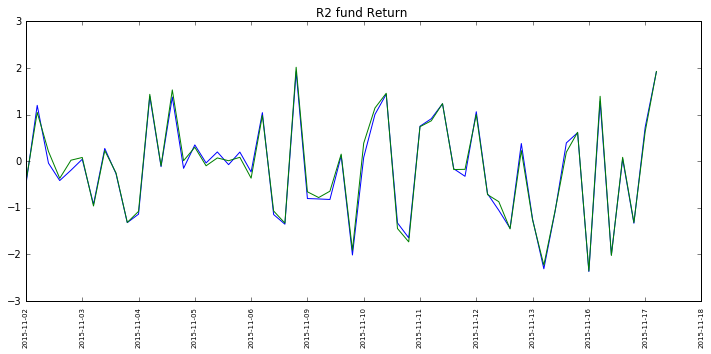

Fund number:  4
30.1880011355
9.83333333333


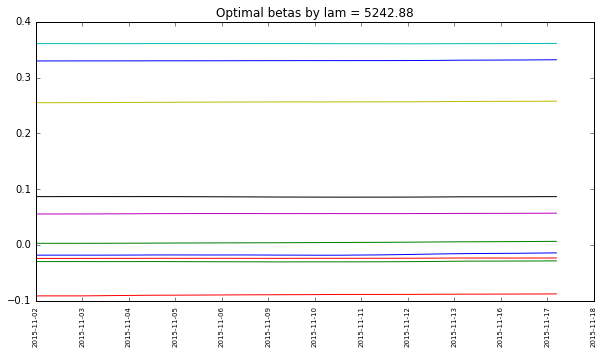

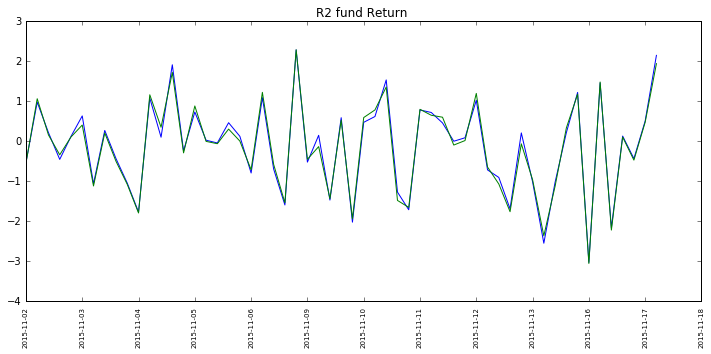

Fund number:  5
29.7172139237
12.3333333333


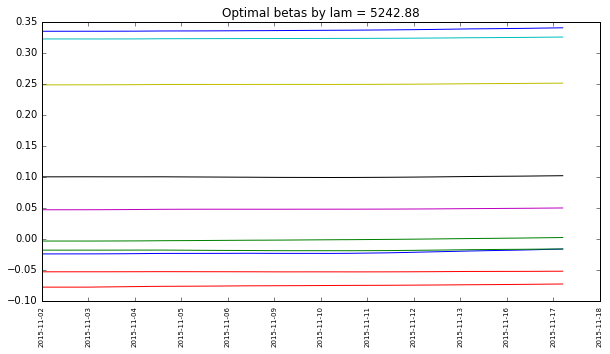

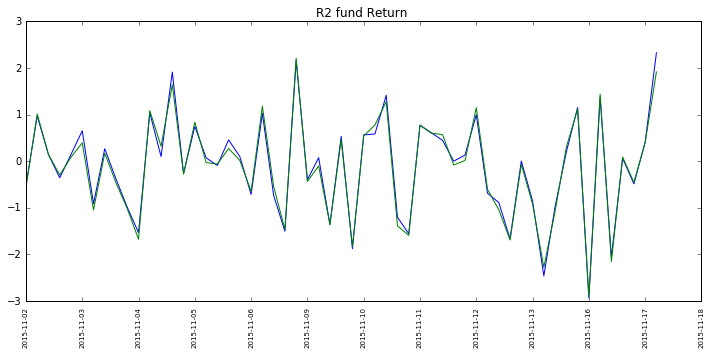

Fund number:  6
26.118089787
58.0


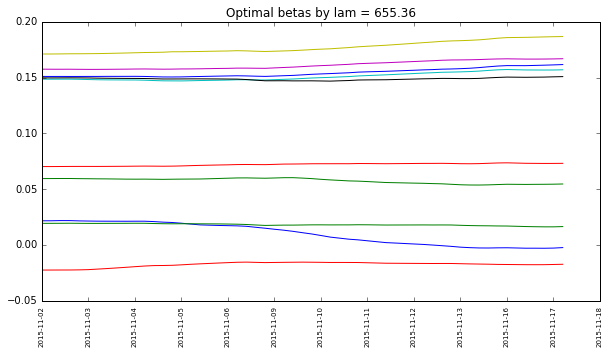

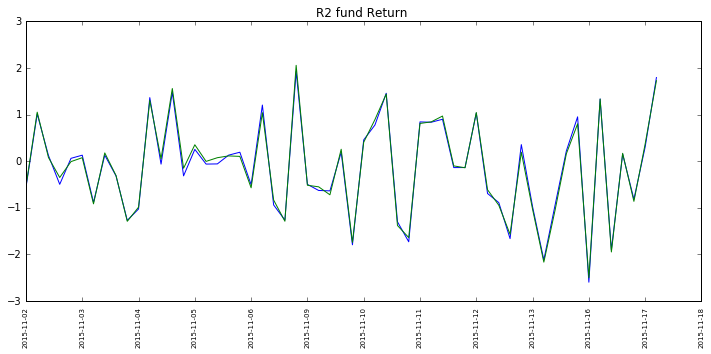

Fund number:  7
30.8097536503
9.33333333333


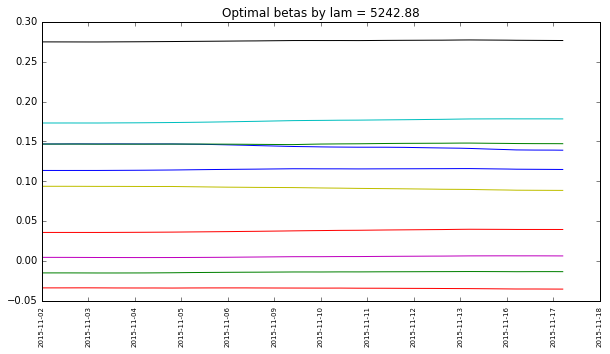

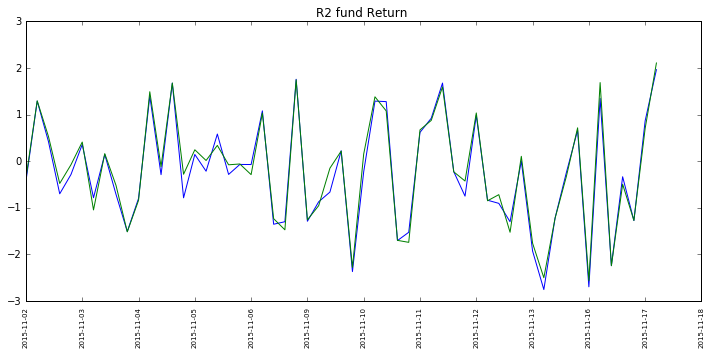

Fund number:  8
63.3015445364
19.0


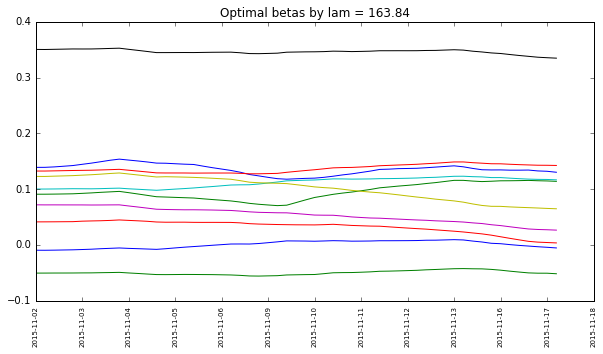

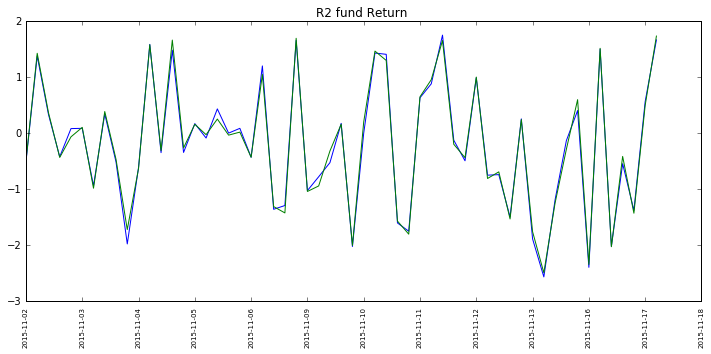

Fund number:  9
284.940282689
77.5


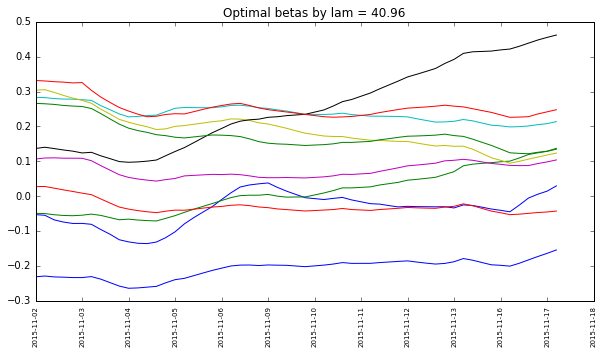

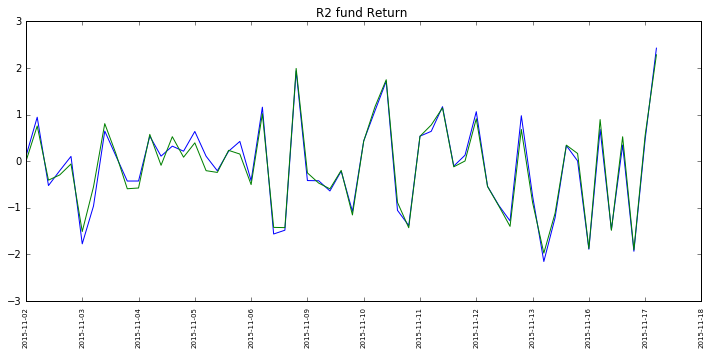

Fund number:  10
30.8729847148
10.3333333333


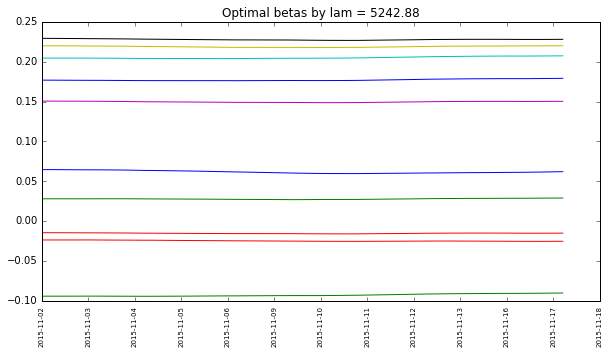

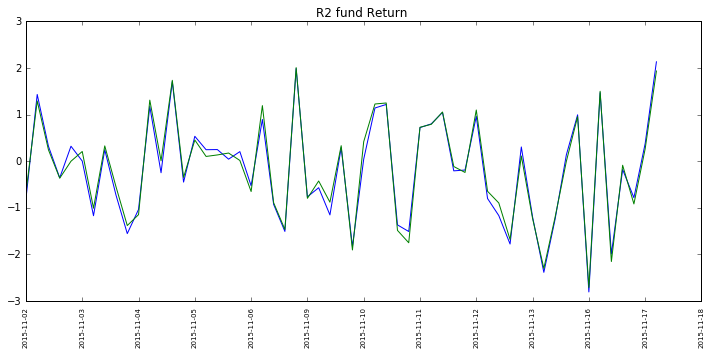

In [239]:
for fn in range(fnum):
    lam_min = lam_arr[LOO_min_r2[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    LOO_beta_opt += [beta_opt_lam]
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    print("Fund number: ", fn+1)
    print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100)
    LOO_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100]
    print(turn_overs[fn]/6)
    #print(beta_opt_lam[:, 0])
    
    plt.figure(figsize=(10,5))
    title = 'Optimal betas by lam = ' + str(lam_min)
    plt.title(title)
    plt.plot(time, beta_opt_lam[:, 1:])
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)  
    plt.show()

    # Plot  return
    plt.figure(figsize=(10,5))
    plt.title('R2 fund Return ')
    plt.xticks(time, dates, rotation=90, size = 7)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)
    plt.plot(time, fund)
    plt.plot(time, fund_est)
    plt.tight_layout() 

    plt.show()

In [ ]:
lam_arr[LOO_min_r2[0][1]]

In [109]:
%store AIC_min_r2

Stored 'AIC_min_r2' (list)


In [110]:
%store LHO_min_r2

Stored 'LHO_min_r2' (list)


In [259]:
np.round(turn_overs/6, decimals=2)

array([ 29.33,  12.5 ,  16.83,   9.83,  12.33,  58.  ,   9.33,  19.  ,
        77.5 ,  10.33])

In [248]:
LOO_tov

[53.907248889240876,
 40.715239436122836,
 24.288997001127772,
 30.188001135495234,
 29.717213923709995,
 26.118089786970224,
 30.809753650291817,
 63.301544536411669,
 284.94028268938564,
 30.872984714759056]

In [249]:
LHO_tov

[1319.903158668388,
 254.56556200510997,
 36.380288128922828,
 114.11549070822706,
 154.52932523757735,
 39.911209238207299,
 315.17470930692843,
 382.39928083704632,
 652.9318752555414,
 88.964107821543863]

In [250]:
AIC_tov

[1690.1768885120164,
 34.565053826900531,
 23.17425792882722,
 28.807366378062348,
 46.5183125603169,
 21.211631571284283,
 315.17470930692843,
 47.824205756149155,
 652.9318752555414,
 63.162311793401592]

In [251]:
Evid_tov

[87.522628120125603,
 68.81137220325688,
 54.85557933898361,
 79.410593431519544,
 97.108020897393317,
 50.76918240561389,
 62.031013986559856,
 83.387322765847387,
 123.7303034193058,
 60.413411800458469]

In [260]:
np.sqrt(np.sum((turn_overs/6 - np.array(LOO_tov))**2))

221.50788614974294

In [261]:
np.sqrt(np.sum((turn_overs/6 - np.array(LHO_tov))**2))

1522.7844867067142

In [262]:
np.sqrt(np.sum((turn_overs/6 - np.array(AIC_tov))**2))

1786.0831239363395

In [263]:
np.sqrt(np.sum((turn_overs/6 - np.array(Evid_tov))**2))

177.90646825972181

In [156]:
[len(evid_list_full1[i]) for i in range(10)]

[156, 83, 128, 216, 120, 133, 149, 185, 246, 144]

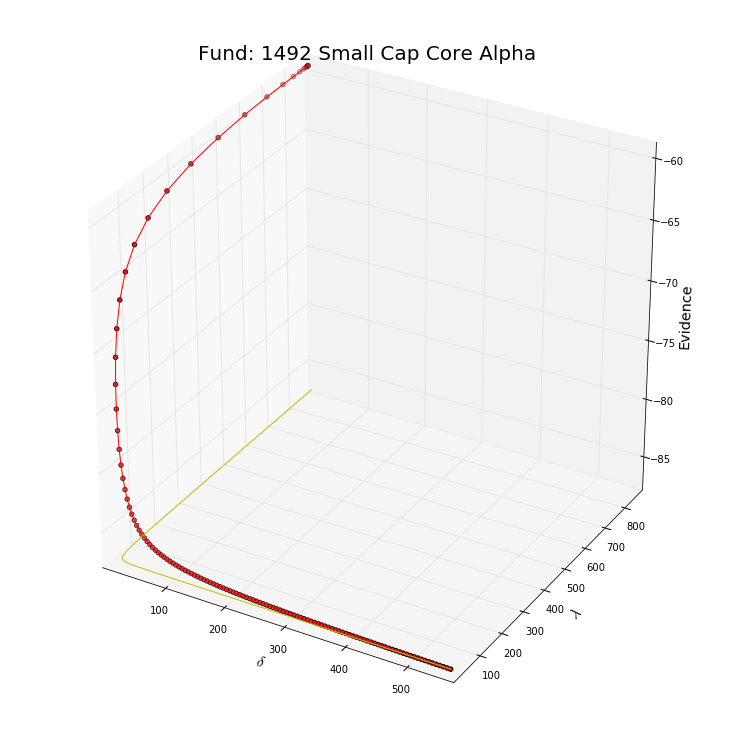

In [191]:
fn = 0
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
dl, ll, el = delta_list_full1[fn], lam_list_full1[fn], evid_list_full1[fn]
#ax.plot(delta_list[1::2], lam_list[1::2], evid_list[1::2])
plt.title("Fund: "+fundnames[fn], fontsize=20)
ax.plot(dl, ll, el, c='r')
ax.scatter(dl, ll, el, c='r')
ax.plot(dl, ll, min(el), c='y', lw=1)
ax.set_xlim(np.min(dl), np.max(dl))
ax.set_xlabel('$\delta$', fontsize=15)
ax.set_ylim(np.min(ll), np.max(ll))
ax.set_ylabel('$\lambda$', fontsize=15)
ax.set_zlim(np.min(el), np.max(el))
ax.set_zlabel('Evidence')

In [71]:
fundnames[5]

'AB Select US Equity A'

In [231]:
def print_vkr(lam_min, method, fn):
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    #Evid_beta_opt += [beta_opt_lam]
    fund_est = np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    #print("Fund number: ", fn+1)
    #print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100)
    #Evid_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,-1], assetstbl)*100]
    #print(turn_overs[fn]/6)
    #print(beta_opt_lam[:, 0])
    suptitle = "Fund: "+fundnames[5]+"\n"

    plt.figure(figsize=(10,5))
    title = method + r"Optimal $\beta$ by $\lambda$ = " + str(lam_min)
    plt.title(suptitle+title, fontsize=20)
    #plt.suptitle("Fund: "+fundnames[5], fontsize=20)
    labels = [str(i+1)+" asset"  for i in range(beta_opt_lam[:, 1:].shape[1])]
    for y_arr, label in zip(beta_opt_lam[:, 1:].T, labels):
        plt.plot(time, y_arr, label=label)
    #plt.plot(time, beta_opt_lam[:, 1:], labels=)
    plt.xticks(time, dates, rotation=90, size = 7)
    plt.ylabel(r"Factors of assets, $\beta$", fontsize=15)
    plt.xlabel("Date", fontsize=15)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)  
    #plt.legend()
    plt.show()

    # Plot  return
    plt.figure(figsize=(10,5))
    #plt.suptitle(, fontsize=20)
    plt.title(suptitle+method + r"Fund's return $\mathbf{y}$", fontsize=20)
    plt.xticks(time, dates, rotation=90, size = 7)
    plt.ylabel(r"Return, $\mathbf{y}$", fontsize=15)
    plt.xlabel("Date", fontsize=15)
    ax = plt.gca()
    ax.get_xaxis().set_tick_params(pad=5)
    ax.get_xaxis().set_major_locator(majorLocator)
    plt.plot(time, fund, label="Source")
    plt.plot(time, fund_est, label="Estimation")
    plt.grid()
    plt.legend()
    plt.tight_layout() 
    
    plt.show()

In [232]:
lam_arr

[0.02,
 0.04,
 0.08,
 0.16,
 0.32,
 0.64,
 1.28,
 2.56,
 5.12,
 10.24,
 20.48,
 40.96,
 81.92,
 163.84,
 327.68,
 655.36,
 1310.72,
 2621.44,
 5242.88]

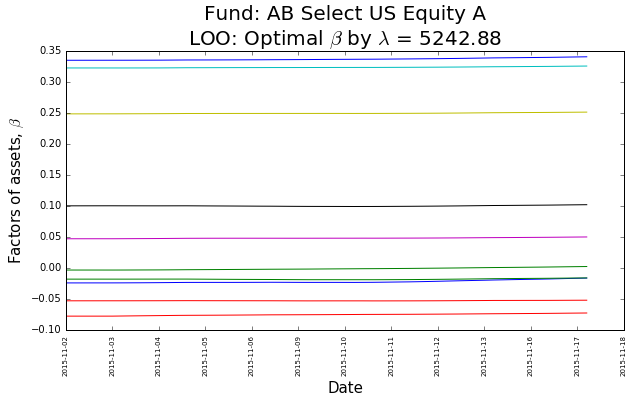

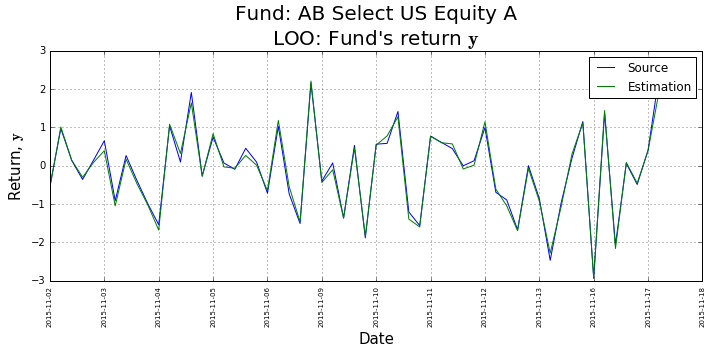

In [247]:
fn = 4
lam_min, method = lam_arr[LOO_min_r2[0][1]], "LOO: "
print_vkr(lam_min, method, fn)

In [271]:
lam_arr

[0.02,
 0.04,
 0.08,
 0.16,
 0.32,
 0.64,
 1.28,
 2.56,
 5.12,
 10.24,
 20.48,
 40.96,
 81.92,
 163.84,
 327.68,
 655.36,
 1310.72,
 2621.44,
 5242.88]

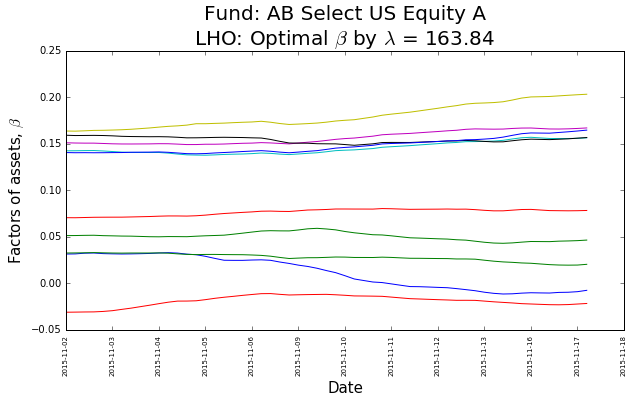

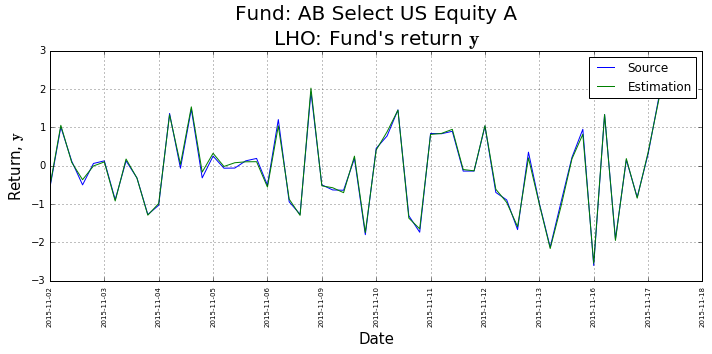

In [234]:
fn = 5
lam_min, method = lam_arr[LHO_min_r2[fn][1]], "LHO: "
print_vkr(lam_min, method, fn)

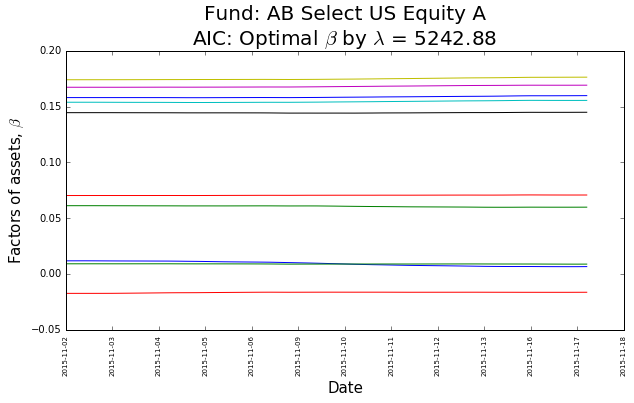

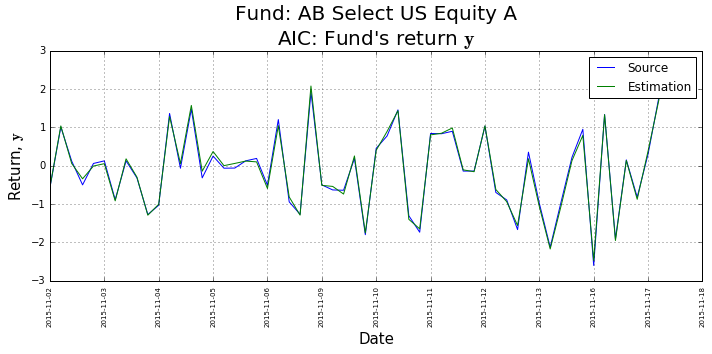

In [235]:
fn = 5
lam_min, method = lam_arr[AIC_min_r2[fn][1]], "AIC: "
print_vkr(lam_min, method, fn)

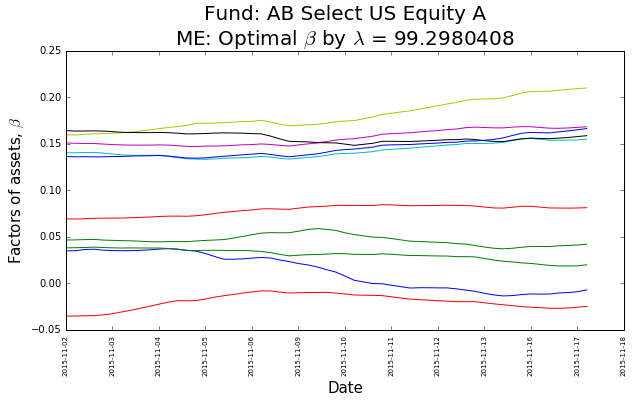

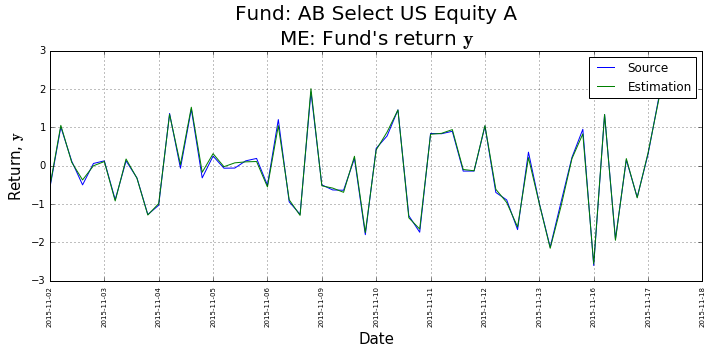

In [236]:
fn = 5
lam_min, method = lam_list_full1[fn][-1], "ME: "
print_vkr(lam_min, method, fn)

### Step 11. Model data

In [318]:
n, N = 10, 100
sigma_x = np.ones((n))
mu_x = np.random.randn(n)
cov_x = sigma_x * np.eye(n)

model_assets = np.random.multivariate_normal(mu_x, cov_x, N)

print(np.mean((assetstbl > -0.5 )* (assetstbl < 0.5)))

print(np.mean((model_assets > -0.5 )* (model_assets < 0.5)))

0.317543859649
0.323


In [381]:
def generate(alpha, X=model_assets):
    n, N = 10, 100
    beta = np.empty((N, n))
    beta[...] = (2*np.random.rand(n) - 1)[np.newaxis, :]
    ksi = (1/alpha)*np.random.randn(N-1, n)
    ksi = np.cumsum(ksi, axis=0)
    beta[1:] += ksi
    
    y = 1.05*np.sum(X*beta, axis=1)
    delta = 1/(0.05*np.sum(X*beta, axis=1))**2
    
    return {'y':y, 'beta':beta, 'delta':delta}
    

In [382]:
model1 = generate(10)
model2 = generate(20)
model3 = generate(30)

In [385]:
print(np.mean((fundstbl > -0.5 )* (fundstbl < 0.5)))

m_y = model1['y']
print(np.mean((m_y > -0.5 )* (m_y < 0.5)))

0.354385964912
0.26


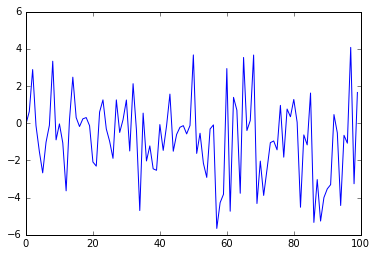

In [386]:
plt.plot(model1['y'])

### Step 11.1 Model experiments

In [325]:
lam_arr = []
lam = 0.01
while lam <=5000:
    lam = lam*2
    lam_arr.append(lam)

In [326]:
lam_arr

[0.02,
 0.04,
 0.08,
 0.16,
 0.32,
 0.64,
 1.28,
 2.56,
 5.12,
 10.24,
 20.48,
 40.96,
 81.92,
 163.84,
 327.68,
 655.36,
 1310.72,
 2621.44,
 5242.88]

In [405]:
fundsall = np.matrix((model1['y'], model2['y'], model3['y'])).T
fundsall.shape

(100, 3)

In [406]:
assetsall = np.matrix(model_assets)
assetsall.shape

(100, 10)

In [407]:
fnum = 3; T = N; time =  range(T); dynamic_model = 0

In [414]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as pyplot
majorLocator = MultipleLocator(5)

dynamic_model=0
outPoint = np.zeros([T,1])
time =  range(T)
LOO_min_r2_m = []
LOO_r2_lam_arr_fund_m = []
for fn in range(fnum):
    fund = fundsall[:,fn]

    
    r2_lam_arr = []
    for lam in lam_arr:
         r2_arr, r2_lam, fund_out = nsr.LeaveOneOut(assetsall,fund,lam,dynamic_model)
         r2_lam_arr.append(r2_lam)

    print("Fund: ", fn)
    LOO_min_r2_m += [(np.min(r2_lam_arr),np.argmin(r2_lam_arr))]
    LOO_r2_lam_arr_fund_m += [r2_lam_arr]
#print  r2_lam_arr

Fund:  0
Fund:  1
Fund:  2


In [415]:
LOO_min_r2_m

[(0.48383594104264277, 9), (0.13577858176803484, 6), (0.03882886829726865, 8)]

In [487]:
[lam_arr[LOO_min_r2_m[fn][1]]  for fn in range(fnum)]

[10.24, 1.28, 5.12]

In [439]:
LOO_fund_opt = []; LOO_beta_opt = []

In [440]:
for fn in range(3):
    lam_min = lam_arr[LOO_min_r2_m[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    #beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    LOO_beta_opt += [beta_opt_lam]
    LOO_fund_opt+= [fund_est]#np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    #print("Fund number: ", fn+1)
    #print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    #print(turn_overs[fn]/6)
    #AIC_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
   

In [408]:
#band = 10
LHO_min_r2_m = []
LHO_r2_lam_arr_fund_m = []
for fn in range(fnum):
    fund = fundsall[:,fn]
    r2_lam_arr = []

    r2_lam_t = np.zeros([len(lam_arr),T]) 
    ilam = 0
    for lam in lam_arr:
         r2_arr, r2_lam, fund_out = nsr.LeaveHalfOut(assetsall,fund,lam,dynamic_model)
         r2_lam_t[ilam,:] = r2_arr.T    
         r2_lam_arr.append(r2_lam)
         ilam = ilam+1
    print("Fund: ", fn)
    LHO_min_r2_m += [(np.min(r2_lam_arr),np.argmin(r2_lam_arr))]
    LHO_r2_lam_arr_fund_m += [r2_lam_arr]

Fund:  0
Fund:  1
Fund:  2


In [409]:
LHO_min_r2_m

[(0.34576633932508211, 9), (0.10585768042299661, 6), (0.037545940488186068, 5)]

In [486]:
[lam_arr[LHO_min_r2_m[fn][1]]  for fn in range(fnum)]

[10.24, 1.28, 0.64]

In [441]:
LHO_fund_opt = []; LHO_beta_opt = []

In [442]:
for fn in range(3):
    lam_min = lam_arr[LHO_min_r2_m[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    #beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    LHO_beta_opt += [beta_opt_lam]
    LHO_fund_opt += [fund_est]#np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    #print("Fund number: ", fn+1)
    #print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    #print(turn_overs[fn]/6)
    #AIC_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
   

AIC

In [411]:
AIC_min_r2_m = []
AIC_r2_lam_arr_fund_m = []
for fn in range(fnum):
    fund = fundsall[:,fn]
    r2_lam_arr = []
    tr_lam_arr = []
    arr = []
    for lam in lam_arr:
         r2_lam, trace_lam = nsr.AIC(assetsall,fund,lam,dynamic_model)
         r2_lam_arr.append(r2_lam*30)
         tr_lam_arr.append(trace_lam)
    new_r2_lam_arr = [x *T  for x in  r2_lam_arr]
    tr_lam_arr = [x for x in  tr_lam_arr]
    aic = [x + y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
    #print([(aic[i], lam_arr[i]) for i in range(len(lam_arr))])
    print("Fund: ", fn)
    AIC_min_r2_m +=  [(np.min(aic), np.argmin(aic))]  
    AIC_r2_lam_arr_fund_m += [aic]

Fund:  0
Fund:  1
Fund:  2


In [413]:
AIC_min_r2_m

[(98.151819706163479, 6), (93.246201132901106, 8), (79.538680688346957, 11)]

In [485]:
[lam_arr[AIC_min_r2_m[fn][1]]  for fn in range(fnum)]

[1.28, 5.12, 40.96]

In [437]:
AIC_fund_opt = []; AIC_beta_opt = []

In [438]:
for fn in range(3):
    lam_min = lam_arr[AIC_min_r2_m[fn][1]]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    #beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    AIC_beta_opt += [beta_opt_lam]
    AIC_fund_opt+= [fund_est]#np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    #print("Fund number: ", fn+1)
    #print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    #print(turn_overs[fn]/6)
    #AIC_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
   

### Evidence

In [399]:
N, n = assetsall.shape
U = np.zeros((N, n, n))
V = np.zeros((N, n, n))
for i in range(1, N):
    U[i] = np.eye(n)
    V[i] = np.eye(n)
X = np.zeros((N*n, N))
for i in range(N):
    X[n*i:n*(i+1), i] = np.array(assetsall[i])

In [400]:
evid_list_full_m = []
lam_list_full_m = []
delta_list_full_m = []

In [403]:
# tmpstmp = []
# evid_list_full = []
# lam_list_full = []
# delta_list_full = []
import time
#for i in range(1):
tm = time.time()
# evid_list = []
# lam_list = []
# delta_list = []
for fn in range(2, 3):
    evid_list = []
    lam_list = []
    delta_list = []
    y = np.array(fundsall[:, fn]).reshape(-1)
    iterate_log_evidence1(evid_list, lam_list, delta_list, y, X, V, verbose=False)

    evid_list_full_m += [evid_list]
    lam_list_full_m += [lam_list] 
    delta_list_full_m += [delta_list]
    print("Fund number {0:}, time {1}".format(fn,time.time() - tm))
    tm = time.time()
# tmpstmp += [time.time() - tm]

Time: 1190.6934170722961, iter: 3863, lambda: 0.044838462395400056, delta: 17555.31606310445
Fund number 2, time 1192.5629987716675


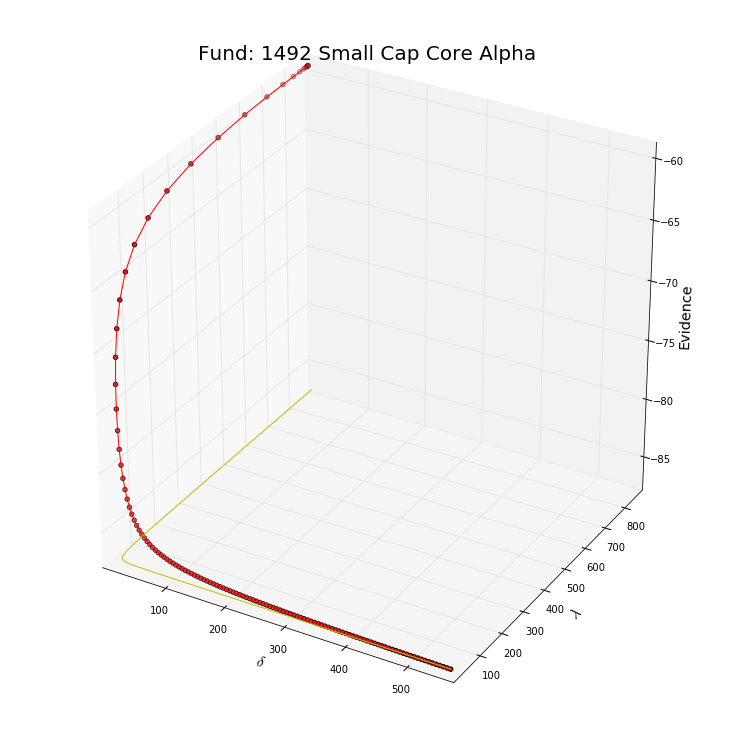

In [390]:
fn = 0
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
dl, ll, el = delta_list_full_m[fn], lam_list_full_m[fn], evid_list_full_m[fn]
#ax.plot(delta_list[1::2], lam_list[1::2], evid_list[1::2])
plt.title("Fund: "+fundnames[fn], fontsize=20)
ax.plot(dl, ll, el, c='r')
ax.scatter(dl, ll, el, c='r')
ax.plot(dl, ll, min(el), c='y', lw=1)
ax.set_xlim(np.min(dl), np.max(dl))
ax.set_xlabel('$\delta$', fontsize=15)
ax.set_ylim(np.min(ll), np.max(ll))
ax.set_ylabel('$\lambda$', fontsize=15)
ax.set_zlim(np.min(el), np.max(el))
ax.set_zlabel('Evidence')

In [430]:
[(lam_list_full_m[fn][-1], delta_list_full_m[fn][-1]) for fn in range(fnum)]

[(24.522786170691468, 7.1105486634787676),
 (3.4569011986517322, 108.71462771762975),
 (0.044838462395400056, 17555.316063104448)]

In [435]:
ME_fund_opt = []; ME_beta_opt = []

In [436]:
for fn in range(3):
    lam_min = lam_list_full_m[fn][-1]
    fund = fundsall[:,fn]
    beta_opt_lam, fund_est = nsr.nonstatRegress(assetsall,fund, lam_min, outPoint,dynamic_model)
    #beta_opt_lam = np.hstack((1 - np.sum(beta_opt_lam, axis=1).reshape(-1, 1), beta_opt_lam))
    ME_beta_opt += [beta_opt_lam]
    ME_fund_opt+= [fund_est]#np.array([np.sum(raw_assets[t, :] * beta_opt_lam[t, :]) for t in range(N)])
    #print("Fund number: ", fn+1)
    #print(turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100)
    #print(turn_overs[fn]/6)
    #AIC_tov += [turn_over(beta_opt_lam[:, 1:], fundstbl[:,fn], assetstbl)*100]
   

### Step 11.2 Errors

Средняя квадратчная ошибка доходностей

In [525]:
for fn in range(fnum):
    norm = np.sum(np.array(fundsall[:, fn]).reshape(-1)**2)
    diff = np.sum((np.sum(np.array(assetsall)*LOO_beta_opt[fn], axis=1) - np.array(fundsall[:, fn]).reshape(-1))**2)
    print(np.sqrt(diff/norm)) 

0.0529459389994
0.0031329491932
0.00748892990648


In [526]:
for fn in range(fnum):
    norm = np.sum(np.array(fundsall[:, fn]).reshape(-1)**2)
    diff = np.sum((np.sum(np.array(assetsall)*LHO_beta_opt[fn], axis=1) - np.array(fundsall[:, fn]).reshape(-1))**2)
    print(np.sqrt(diff/norm)) 

0.0529459389994
0.0031329491932
0.00120033293954


In [527]:
for fn in range(fnum):
    norm = np.sum(np.array(fundsall[:, fn]).reshape(-1)**2)
    diff = np.sum((np.sum(np.array(assetsall)*AIC_beta_opt[fn], axis=1) - np.array(fundsall[:, fn]).reshape(-1))**2)
    print(np.sqrt(diff/norm)) 

0.00941726847698
0.0103593628496
0.0276390383176


In [528]:
for fn in range(fnum):
    norm = np.sum(np.array(fundsall[:, fn]).reshape(-1)**2)
    diff = np.sum((np.sum(np.array(assetsall)*ME_beta_opt[fn], axis=1) - np.array(fundsall[:, fn]).reshape(-1))**2)
    print(np.sqrt(diff/norm)) 

0.0899390086492
0.0075367785131
8.77682482312e-05


Средняя квадратчная ошибка коэффициентов

In [507]:
model_beta = [model1['beta'], model2['beta'], model3['beta']]

In [510]:
for fn in range(fnum):
    norm = np.sqrt(np.sum(model_beta[fn]**2))
    diff = np.sqrt(np.sum((LOO_beta_opt[fn] - model_beta[fn])**2))
    print(diff/norm) 

0.298459005605
0.14521026021
0.106767093814


In [511]:
for fn in range(fnum):
    norm = np.sqrt(np.sum(model_beta[fn]**2))
    diff = np.sqrt(np.sum((LHO_beta_opt[fn] - model_beta[fn])**2))
    print(diff/norm) 

0.298459005605
0.14521026021
0.107842182562


In [512]:
for fn in range(fnum):
    norm = np.sqrt(np.sum(model_beta[fn]**2))
    diff = np.sqrt(np.sum((AIC_beta_opt[fn] - model_beta[fn])**2))
    print(diff/norm) 

0.304036684404
0.147379546681
0.108257635293


In [513]:
for fn in range(fnum):
    norm = np.sqrt(np.sum(model_beta[fn]**2))
    diff = np.sqrt(np.sum((ME_beta_opt[fn] - model_beta[fn])**2))
    print(diff/norm) 

0.297960769915
0.146464248573
0.108083895816
